In [43]:
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform


## 读取文件

#### 读取销量

In [5]:
def readSalesWeight(filename):
    length = 0
    sales_weight = []
    with open(filename, 'r', encoding='UTF-8', newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            if not row[0].isdigit():
                continue
            length += 1
            sales_weight.append(row[2])
    return sales_weight, length

#### 读取多个单品文件

In [7]:

def readSingleFile(source_father_path):
    singleSalesDict = {}
    singleSalesLengthDict = {}
    for root, _, files in os.walk(source_father_path):
        for file in files:
            filePath = os.path.join(root, file)
            sale_weight_lst, sales_weight_length = readSalesWeight(filePath)
            # 分配类型字典
            Kind = root.split("\\")[-1]
            print(Kind)
            if Kind not in singleSalesDict:
                singleSalesDict[Kind] = {}
                singleSalesLengthDict[Kind] = {}

            # 分配单个商品
            product = file.split("_")[1].strip(".csv")
            print(product)
            singleSalesDict[Kind][product] = sale_weight_lst
            singleSalesLengthDict[Kind][product] = sales_weight_length

    return singleSalesDict, singleSalesLengthDict

### 读取多个品类文件

In [10]:
def readCategoryFile(source_father_path):
    singleSalesDict = {}
    singleSalesLengthDict = {}
    for root, _, files in os.walk(source_father_path):
        for file in files:
            filePath = os.path.join(root, file)
            sale_weight_lst, sales_weight_length = readSalesWeight(filePath)
            # print(file)
            category = ""
            if file.__contains__("月"):
                category = file.split("月")
            elif file.__contains__("日"):
                category = file.split("日")
            print(category[0])

            if category[0] not in singleSalesDict:
                singleSalesDict[category[0]] = sale_weight_lst
                singleSalesLengthDict[category[0]] = sales_weight_length

    return singleSalesDict, singleSalesLengthDict

In [11]:
testCate3, testCate4 = readCategoryFile(r"D:\Git\国赛\data\销售量数据\品类\每日")

水生根茎类
花叶类
花菜类
茄类
辣椒类
食用菌


#### 读取单类以及品类函数

In [13]:
def readAllData(source_path):
    dataDict = {}
    dataLengthDict = {}
    intern1_lst = ['单类', '品类']
    intern2_lst = ['每日', '每月']
    for intern1 in intern1_lst:
        if intern1 not in dataDict:
            dataDict[intern1] = {}
            dataLengthDict[intern1] = {}
        for intern2 in intern2_lst:
            folder_path = os.path.join(source_path, intern1, intern2)
            if intern1 == '单类':
                dataDict[intern1][intern2], dataLengthDict[intern1][intern2] = readSingleFile(folder_path)
            else:
                dataDict[intern1][intern2], dataLengthDict[intern1][intern2] = readCategoryFile(folder_path)

    return dataDict, dataLengthDict

In [14]:
soldVolumeDict, soldDaysDict = readAllData(r'D:\Git\国赛\data\销售量数据')

水生根茎类
净藕(1)
水生根茎类
净藕(2)
水生根茎类
净藕(3)
水生根茎类
洪湖莲藕(粉藕)
水生根茎类
洪湖莲藕(脆藕)
水生根茎类
洪湖藕带
水生根茎类
红莲藕带
水生根茎类
荸荠(份)
水生根茎类
荸荠
水生根茎类
莲蓬(个)
水生根茎类
菱角
水生根茎类
藕
水生根茎类
藕尖
水生根茎类
野生粉藕
水生根茎类
野藕(1)
水生根茎类
野藕(2)
水生根茎类
高瓜(1)
水生根茎类
高瓜(2)
水生根茎类
鲜藕带(袋)
花叶类
上海青(份)
花叶类
上海青
花叶类
东门口小白菜
花叶类
丝瓜尖
花叶类
云南油麦菜(份)
花叶类
云南油麦菜
花叶类
云南生菜(份)
花叶类
云南生菜
花叶类
保康高山大白菜
花叶类
冰草(盒)
花叶类
冰草
花叶类
南瓜尖
花叶类
双沟白菜
花叶类
四川红香椿
花叶类
外地茼蒿(份)
花叶类
外地茼蒿
花叶类
大白菜
花叶类
大白菜秧
花叶类
大芥兰
花叶类
奶白菜(份)
花叶类
奶白菜
花叶类
奶白菜苗
花叶类
娃娃菜
花叶类
小白菜(份)
花叶类
小白菜
花叶类
小青菜(1)
花叶类
小青菜(2)
花叶类
小青菜(份)
花叶类
快菜
花叶类
春菜
花叶类
木耳菜(份)
花叶类
木耳菜
花叶类
本地上海青
花叶类
本地小毛白菜
花叶类
本地菠菜
花叶类
本地黄心油菜
花叶类
枝江红菜苔(份)
花叶类
枝江红菜苔
花叶类
槐花
花叶类
油菜苔
花叶类
洪山菜苔
花叶类
洪山菜薹珍品手提袋
花叶类
洪山菜薹莲藕拼装礼盒
花叶类
牛首油菜
花叶类
牛首生菜
花叶类
甘蓝叶
花叶类
甜白菜
花叶类
田七
花叶类
白菜苔
花叶类
白蒿
花叶类
竹叶菜(份)
花叶类
竹叶菜
花叶类
紫苏(份)
花叶类
紫苏
花叶类
紫贝菜
花叶类
红橡叶
花叶类
红珊瑚(粗叶)
花叶类
红薯尖(份)
花叶类
红薯尖
花叶类
绿牛油
花叶类
艾蒿
花叶类
芝麻苋菜
花叶类
芥兰
花叶类
芥菜
花叶类
苋菜(份)
花叶类
苋菜
花叶类
茼蒿(份)
花叶类
茼蒿
花叶类
荠菜
花叶类
菊花油菜
花叶类
菜心(份)
花叶类
菜心
花叶类
菠菜(份)
花叶类
菠菜
花叶类
萝卜叶
花叶类
蒲公英
花叶类
蔡甸藜蒿(份)
花叶类
蔡甸藜蒿
花叶类
薄荷叶
花叶类
襄甜红菜苔(袋)
花叶类
豌豆尖
花叶类
随州泡泡青
花叶类
青菜苔
花叶类
面条菜
花叶类
马兰

# 标准化

### 展示描述性统计

In [15]:
def extractSizeAmongFiles(targetDict):
    tempLst = []
    for _, temp_size in targetDict.items():
        tempLst.append(temp_size)
    return tempLst

In [16]:
def sizeStatisticsPackage(data_dict):
    result_dict = {}
    intern1_lst = ['单类', '品类']
    intern2_lst = ['每日', '每月']
    for intern1 in intern1_lst:
        if intern1 not in result_dict:
            result_dict[intern1] = {}
        for intern2 in intern2_lst:
            if intern1 == '单类':
                result_dict[intern1][intern2] = {}
                for temp_category, temp_item in data_dict[intern1][intern2].items():
                    print(f"{temp_category}")
                    result_dict[intern1][intern2][temp_category] = extractSizeAmongFiles(temp_item)
            else:# 品类
                result_dict[intern1][intern2] = extractSizeAmongFiles(data_dict[intern1][intern2])
    return result_dict

In [18]:
sizeDict = sizeStatisticsPackage(soldDaysDict)

水生根茎类
花叶类
花菜类
茄类
辣椒类
食用菌
水生根茎类
花叶类
花菜类
茄类
辣椒类
食用菌


In [21]:
def descriptive_statistics(data_lst):
    # 使用NumPy计算最小值、最大值和标准差
    minimum = np.min(data_lst)
    maximum = np.max(data_lst)
    std_deviation = np.std(data_lst)

    # 创建一个包含统计信息的字典
    statistics = {
        'Minimum': minimum,
        'Maximum': maximum,
        'Range': maximum - minimum,
        'Standard Deviation': std_deviation,
        'Mean': np.mean(data_lst),  # 均值
        'Median': np.median(data_lst),  # 中位数
        'Sum': np.sum(data_lst),  # 总和
        'Count': len(data_lst),  # 数据点数量
    }

    return statistics

def printSizeStatistics(sold_size_dict):
    stats_dict = {}
    intern1_lst = ['单类', '品类']
    intern2_lst = ['每日', '每月']
    for intern1 in intern1_lst:

        if intern1 not in stats_dict:
            stats_dict[intern1] = {}
        for intern2 in intern2_lst:
            print(f"{intern1}_{intern2}")
            if intern1 == '单类':
                stats_dict[intern1][intern2] = {}
                for temp_category, temp_item in sold_size_dict[intern1][intern2].items():
                    print(f"{temp_category}")
                    # 调用函数并打印描述性统计信息
                    stats = descriptive_statistics(temp_item)
                    for key, value in stats.items():

                        print('\t' + key + ':', value)
                    stats_dict[intern1][intern2][temp_category] = stats
            else:# 品类
                stats = descriptive_statistics(sold_size_dict[intern1][intern2])
                for key, value in stats.items():
                    print('\t' + key + ':', value)
                stats_dict[intern1][intern2]  = stats
    return stats_dict


#### 展示描述性统计

In [22]:
sizeStatsDict = printSizeStatistics(sizeDict)

单类_每日
水生根茎类
	Minimum: 0
	Maximum: 1057
	Range: 1057
	Standard Deviation: 253.69137356124384
	Mean: 168.94736842105263
	Median: 86.0
	Sum: 3210
	Count: 19
花叶类
	Minimum: 0
	Maximum: 919
	Range: 919
	Standard Deviation: 244.45320615610672
	Mean: 180.9
	Median: 52.5
	Sum: 18090
	Count: 100
花菜类
	Minimum: 2
	Maximum: 1076
	Range: 1074
	Standard Deviation: 391.4932438752935
	Mean: 374.8
	Median: 337.0
	Sum: 1874
	Count: 5
茄类
	Minimum: 3
	Maximum: 1022
	Range: 1019
	Standard Deviation: 351.74196508235974
	Mean: 320.7
	Median: 139.0
	Sum: 3207
	Count: 10
辣椒类
	Minimum: 0
	Maximum: 858
	Range: 858
	Standard Deviation: 244.7214733246203
	Mean: 239.0222222222222
	Median: 192.0
	Sum: 10756
	Count: 45
食用菌
	Minimum: 0
	Maximum: 821
	Range: 821
	Standard Deviation: 167.4978694355009
	Mean: 131.36111111111111
	Median: 51.0
	Sum: 9458
	Count: 72
单类_每月
水生根茎类
	Minimum: 0
	Maximum: 36
	Range: 36
	Standard Deviation: 9.29003278472548
	Mean: 8.894736842105264
	Median: 7.0
	Sum: 169
	Count: 19
花叶类
	Minimum: 0


#### 插值与下采样

In [23]:
def interpolate_and_downsample(source_dict, target_length=2000):
    original_length = len(source_dict)
    if original_length >= target_length:
        # 降采样
        downsample_ratio = original_length // target_length
        downsampled_data = source_dict[::downsample_ratio]
        return downsampled_data
    else:
        x = np.arange(original_length)
        x_interp = np.linspace(0, original_length - 1, target_length)
        interpolated_data = np.interp(x_interp, x, source_dict)
        return interpolated_data

#### 标准化格式

In [28]:
def normalizeDict(volumeDict, daysDict):
    intern1_lst = ['单类', '品类']
    intern2_lst = ['每日', '每月']
    interpolated_dict = {}
    for intern1 in intern1_lst:
        if intern1 not in interpolated_dict:
            interpolated_dict[intern1] = {}
        for intern2 in intern2_lst:
            interpolated_dict[intern1][intern2] ={}
            if intern1 == '单类':
                for key, _ in volumeDict[intern1][intern2].items():
                    print(key)
                    target_dict = volumeDict[intern1][intern2][key]
                    length_dict = daysDict[intern1][intern2][key]
                    # 设置插值后的频率值
                    max_length = max([value for _, value in length_dict.items()])
                    target_frequency = int(1.0 * max_length)
                    # 对字典中的值进行插值
                    interpolated_dict[intern1][intern2][key] ={}
                    for name, value in target_dict.items():
                        print(name)
                        print(f"{intern1}_{intern2}")
                        print(value)
                        if len(value) <= 5:
                            continue
                        value = np.array(value)

                        value = value.astype('float64')
                        interpolated_data = interpolate_and_downsample(value, target_frequency)
                        interpolated_dict[intern1][intern2][key][name] = interpolated_data
            else:
                target_dict = volumeDict[intern1][intern2]
                length_dict = daysDict[intern1][intern2]
                # 设置插值后的频率值
                max_length = max([value for _, value in length_dict.items()])
                target_frequency = int(1.0 * max_length)
                # 对字典中的值进行插值

                for key, value in target_dict.items():
                    if len(value) <= 5:
                        continue
                    value = np.array(value)
                    value = value.astype('float64')
                    interpolated_data = interpolate_and_downsample(value, target_frequency)
                    interpolated_dict[intern1][intern2][key] = interpolated_data

            # 打印插值后的结果
            for key, value in interpolated_dict.items():
                print(key, len(value))
    return interpolated_dict

In [29]:
interpolatedDict = normalizeDict(soldVolumeDict, soldDaysDict)

水生根茎类
净藕(1)
单类_每日
['8.239', '6.45', '7.464', '9.317', '8.507', '7.684', '8.422', '8.467', '7.809', '8.575', '8.667', '7.122', '7.829000000000001', '7.395', '8.103', '8.286', '8.529', '7.672', '13.548', '11.93', '16.53', '10.008000000000001', '17.846', '19.736', '54.01', '12.736', '23.401', '18.915', '18.206', '21.13', '22.267', '22.408', '23.61', '16.016', '22.016', '16.416', '20.886', '22.39', '22.007', '13.327', '20.255', '15.9', '20.891000000000002', '22.791', '21.992', '25.755', '18.214', '16.698', '16.631', '14.24', '14.733', '65.118', '26.934', '50.933', '45.554', '16.304', '14.702', '13.171', '40.809', '46.129', '37.507', '19.127', '11.303', '13.712', '12.72', '16.957', '16.165', '16.217', '14.348', '17.316', '17.437', '10.129999999999999', '38.336', '38.35', '16.289', '36.441', '17.283', '51.106', '20.343', '62.839', '27.116', '10.966', '23.334', '35.629', '53.561', '18.384999999999998', '17.645', '18.41', '76.672', '25.241', '52.156', '30.566', '50.825', '21.803', '56.572', '3

In [33]:
def range_standardization(data_array):
    """
    对输入的NumPy数组进行极差标准化，并返回标准化后的数组。

    参数：
    data: 输入的NumPy数组

    返回值：
    标准化后的NumPy数组
    """
    min_value = np.min(data_array)
    max_value = np.max(data_array)
    range_data = max_value - min_value

    # 极差标准化公式：(x - min) / (max - min)
    standardized_data = (data_array - min_value) / range_data

    return standardized_data

def standardizeDict(interpolated_dict):
    intern1_list = ['单类', '品类']
    intern2_list = ['每日', '每月']
    standardized_dict = {}
    for intern1 in intern1_list:
        if intern1 not in standardized_dict:
            standardized_dict[intern1] = {}
        for intern2 in intern2_list:
            standardized_dict[intern1][intern2] ={}
            if intern1 == '单类':
                for key, _ in interpolated_dict[intern1][intern2].items():
                    # 对字典中的值进行插值
                    standardized_dict[intern1][intern2][key] ={}
                    target_dict = interpolated_dict[intern1][intern2][key]
                    for name, value in target_dict.items():
                        print(name)
                        print(f"{intern1}_{intern2}")

                        standardized_data = range_standardization(value)
                        standardized_dict[intern1][intern2][key][name] = standardized_data
            else:
                target_dict = interpolated_dict[intern1][intern2]

                for key, value in target_dict.items():

                    standardized_data = range_standardization(value)
                    standardized_dict[intern1][intern2][key] = standardized_data

            # 打印插值后的结果
            for key, value in standardized_dict.items():
                print(key, len(value))
    return standardized_dict

In [35]:
standardized_dict = standardizeDict(interpolatedDict)

净藕(1)
单类_每日
净藕(2)
单类_每日
净藕(3)
单类_每日
洪湖莲藕(粉藕)
单类_每日
洪湖莲藕(脆藕)
单类_每日
洪湖藕带
单类_每日
红莲藕带
单类_每日
荸荠(份)
单类_每日
荸荠
单类_每日
莲蓬(个)
单类_每日
菱角
单类_每日
野生粉藕
单类_每日
野藕(1)
单类_每日
野藕(2)
单类_每日
高瓜(1)
单类_每日
高瓜(2)
单类_每日
鲜藕带(袋)
单类_每日
上海青(份)
单类_每日
上海青
单类_每日
东门口小白菜
单类_每日
丝瓜尖
单类_每日
云南油麦菜(份)
单类_每日
云南油麦菜
单类_每日
云南生菜(份)
单类_每日
云南生菜
单类_每日
保康高山大白菜
单类_每日
冰草(盒)
单类_每日
冰草
单类_每日
四川红香椿
单类_每日
外地茼蒿(份)
单类_每日
外地茼蒿
单类_每日
大白菜
单类_每日
奶白菜(份)
单类_每日
奶白菜
单类_每日
娃娃菜
单类_每日
小白菜(份)
单类_每日
小白菜
单类_每日
小青菜(1)
单类_每日
小青菜(2)
单类_每日
小青菜(份)
单类_每日
快菜
单类_每日
春菜
单类_每日
木耳菜(份)
单类_每日
木耳菜
单类_每日
本地上海青
单类_每日
本地小毛白菜
单类_每日
本地黄心油菜
单类_每日
枝江红菜苔(份)
单类_每日
枝江红菜苔
单类_每日
槐花
单类_每日
油菜苔
单类_每日
洪山菜苔
单类_每日
牛首油菜
单类_每日
牛首生菜
单类_每日
甜白菜
单类_每日
田七
单类_每日
白菜苔
单类_每日
白蒿
单类_每日
竹叶菜(份)
单类_每日
竹叶菜
单类_每日
紫苏(份)
单类_每日
紫苏
单类_每日
紫贝菜
单类_每日
红薯尖(份)
单类_每日
红薯尖
单类_每日
芥菜
单类_每日
苋菜(份)
单类_每日
苋菜
单类_每日
茼蒿(份)
单类_每日
茼蒿
单类_每日
荠菜
单类_每日
菜心(份)
单类_每日
菜心
单类_每日
菠菜(份)
单类_每日
菠菜
单类_每日
萝卜叶
单类_每日
蒲公英
单类_每日
蔡甸藜蒿(份)
单类_每日
蔡甸藜蒿
单类_每日
薄荷叶
单类_每日
襄甜红菜苔(袋)
单类_每日
豌豆尖
单类_每日
随州泡泡青
单类_每日
面条菜
单类_每日
马兰头
单类_每日
马齿苋
单类_每日
鱼腥草(份)
单类_每日
鱼腥草
单类_每日
鲜粽叶

# 绘制热力图

In [81]:
def drawCorrMatrixHotMap(corr_matrix, savingFolder, filename):
    if not os.path.exists(savingFolder):
        os.makedirs(savingFolder)
    # 绘制热力图
    label = 'Category'
    plt.figure(figsize=(10, 8))
    annotCondition = True
    if len(corr_matrix) >= 9:
        annotCondition = False
    if len(corr_matrix) >= 20:
        sns.heatmap(corr_matrix, annot=annotCondition, cmap='coolwarm', vmin=-1, vmax=1, xticklabels=[], yticklabels=[])
    else:
        label_lst = [(label + str(i)) for i in range(len(corr_matrix))]
        sns.heatmap(corr_matrix, annot=annotCondition, cmap='coolwarm', vmin=-1, vmax=1, xticklabels=label_lst, yticklabels=label_lst)

    # text_filename = filename.strip('.jpg') + '_类别名.txt'
    # txt_path = os.path.join(savingFolder, text_filename)
    # with open(txt_path,  'w', encoding='UTF-8', newline='') as f:
    #     for col in corr_matrix.columns.tolist():
    #         f.write(col + '\n')

    # plt.text(1.5, -1.2, txt_path, fontsize=14, ha='center', va='center')
    plt.title('Spearman Rank Correlation Matrix')
    plt.savefig(os.path.join(savingFolder, filename))
    plt.show()


def clusterFromCorrMatrix(corr_matrix, threshold, savingFolder, filename):
    if not os.path.exists(savingFolder):
        os.makedirs(savingFolder)
    dissimilarity = 1 - np.abs(corr_matrix)

    hierarchy = linkage(squareform(dissimilarity), method='average')

    labels = fcluster(hierarchy, threshold, criterion='distance')


    # 通过corr_matrix的列名作为标签
    label = 'Category'
    labels = [(label + str(i)) for i in range(len(corr_matrix))]
    if len(corr_matrix)>=20:
        labels = []
        for _ in range(len(corr_matrix)):
            labels.append('')


    # 绘制层次聚类的树状图
    plt.figure(figsize=(10, 6))
    dendrogram(hierarchy, labels=labels, leaf_rotation=90, leaf_font_size=12)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.tight_layout()
    infoes = filename.strip(".txt").split('_')
    if infoes[0] == '单类':
        infoes[3] = '层析树状图.png'
    else:
        infoes[2] = '层析树状图.png'
    dendrogram_filename = '_'.join(infoes)
    # 保存树状图
    dendrogram_filepath = os.path.join(savingFolder, dendrogram_filename)
    plt.savefig(dendrogram_filepath)

    # 显示树状图
    plt.show()
    txt_path = os.path.join(savingFolder, filename)
    with open(txt_path,  'w', encoding='UTF-8', newline='') as f:
        for index, value in enumerate(corr_matrix.columns.tolist()):
            print(f"Index {index}: {value}")
            f.write(f"{value}: {labels[index]}\n")

    return labels


def calculateDictCorrMatrix(source_dict):
    pearson_corr_matrix_dict = {}
    intern1_lst = ['单类', '品类']
    intern2_lst = ['每日', '每月']
    for intern1 in intern1_lst:
        pearson_corr_matrix_dict[intern1] = {}
        for intern2 in intern2_lst:
            if intern1 == '单类':
                pearson_corr_matrix_dict[intern1][intern2] = {}
                for key, item in source_dict[intern1][intern2].items():
                    temp_df = pd.DataFrame(item)
                    temp_pearson_corr_matrix = temp_df.corr(method='pearson')
                    pearson_corr_matrix_dict[intern1][intern2][key] = temp_pearson_corr_matrix
            else:

                temp_df = pd.DataFrame(source_dict[intern1][intern2])
                temp_pearson_corr_matrix = temp_df.corr(method='pearson')
                pearson_corr_matrix_dict[intern1][intern2] = temp_pearson_corr_matrix
    return pearson_corr_matrix_dict

#### 计算相关性矩阵

In [82]:
pearson_corr_matrices = calculateDictCorrMatrix(interpolatedDict)

#### 绘制热力图和层次分析树状图

单类每日水生根茎类


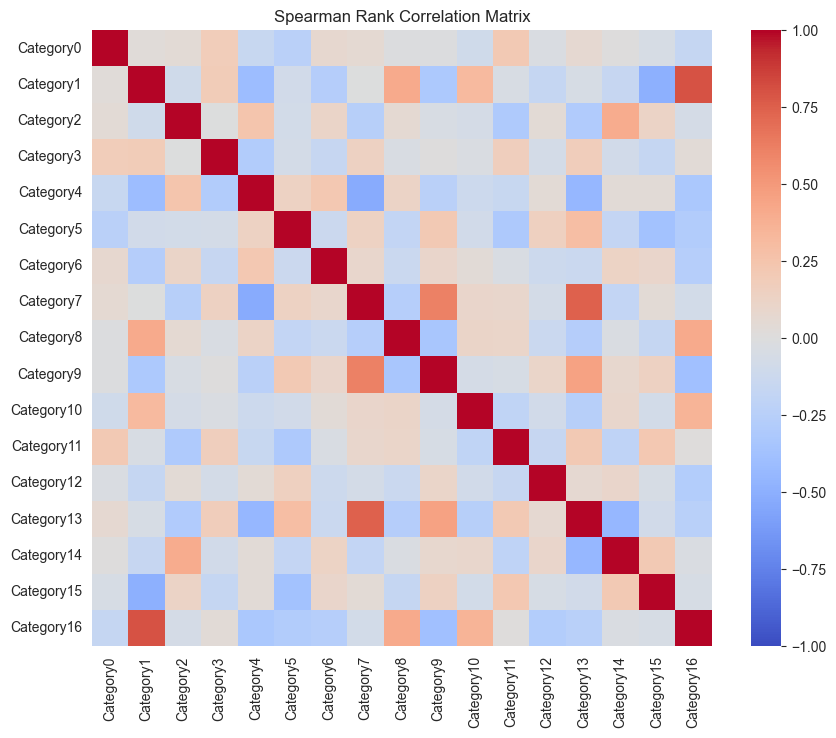

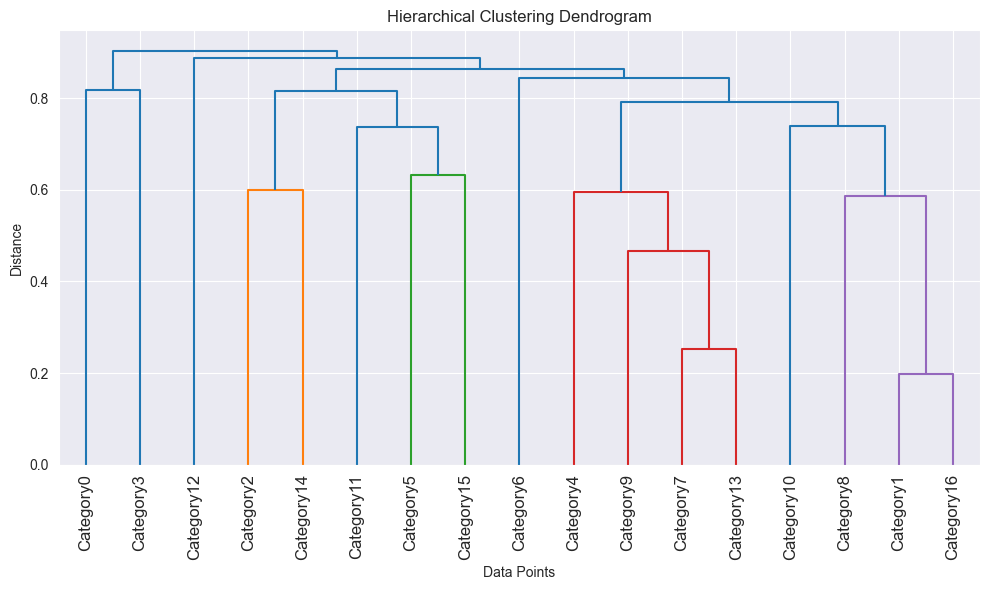

Index 0: 净藕(1)
Index 1: 净藕(2)
Index 2: 净藕(3)
Index 3: 洪湖莲藕(粉藕)
Index 4: 洪湖莲藕(脆藕)
Index 5: 洪湖藕带
Index 6: 红莲藕带
Index 7: 荸荠(份)
Index 8: 荸荠
Index 9: 莲蓬(个)
Index 10: 菱角
Index 11: 野生粉藕
Index 12: 野藕(1)
Index 13: 野藕(2)
Index 14: 高瓜(1)
Index 15: 高瓜(2)
Index 16: 鲜藕带(袋)
单类每日花叶类


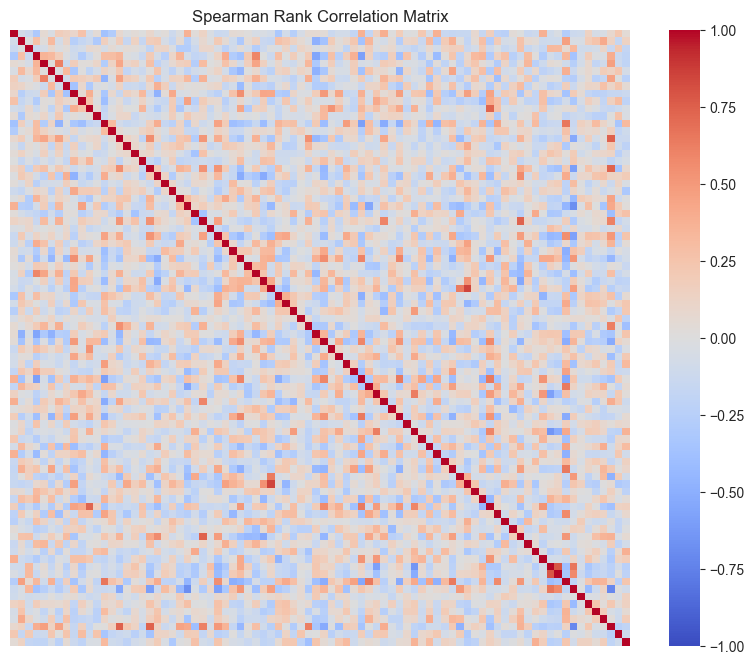

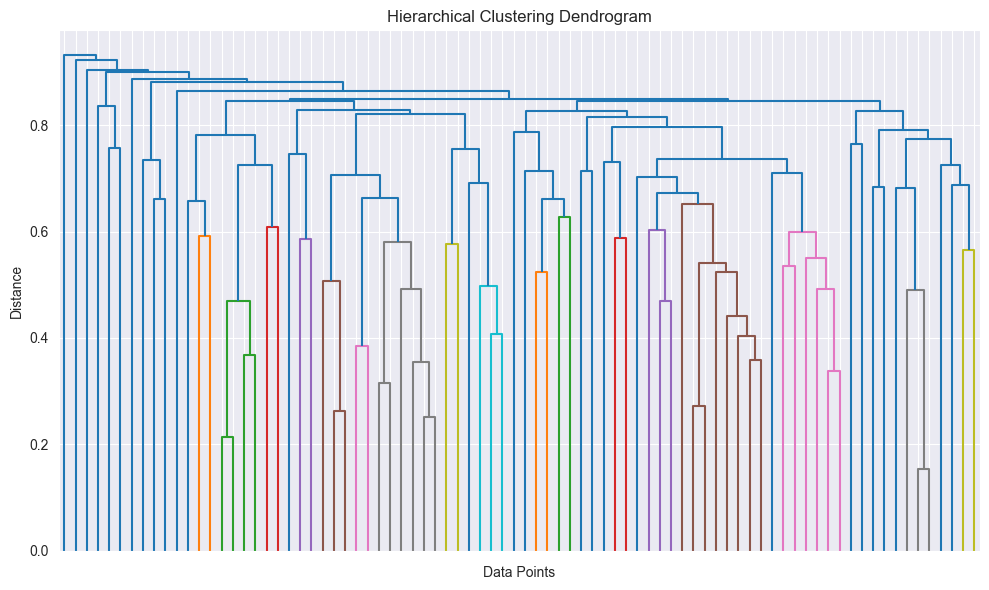

Index 0: 上海青(份)
Index 1: 上海青
Index 2: 东门口小白菜
Index 3: 丝瓜尖
Index 4: 云南油麦菜(份)
Index 5: 云南油麦菜
Index 6: 云南生菜(份)
Index 7: 云南生菜
Index 8: 保康高山大白菜
Index 9: 冰草(盒)
Index 10: 冰草
Index 11: 四川红香椿
Index 12: 外地茼蒿(份)
Index 13: 外地茼蒿
Index 14: 大白菜
Index 15: 奶白菜(份)
Index 16: 奶白菜
Index 17: 娃娃菜
Index 18: 小白菜(份)
Index 19: 小白菜
Index 20: 小青菜(1)
Index 21: 小青菜(2)
Index 22: 小青菜(份)
Index 23: 快菜
Index 24: 春菜
Index 25: 木耳菜(份)
Index 26: 木耳菜
Index 27: 本地上海青
Index 28: 本地小毛白菜
Index 29: 本地黄心油菜
Index 30: 枝江红菜苔(份)
Index 31: 枝江红菜苔
Index 32: 槐花
Index 33: 油菜苔
Index 34: 洪山菜苔
Index 35: 牛首油菜
Index 36: 牛首生菜
Index 37: 甜白菜
Index 38: 田七
Index 39: 白菜苔
Index 40: 白蒿
Index 41: 竹叶菜(份)
Index 42: 竹叶菜
Index 43: 紫苏(份)
Index 44: 紫苏
Index 45: 紫贝菜
Index 46: 红薯尖(份)
Index 47: 红薯尖
Index 48: 芥菜
Index 49: 苋菜(份)
Index 50: 苋菜
Index 51: 茼蒿(份)
Index 52: 茼蒿
Index 53: 荠菜
Index 54: 菜心(份)
Index 55: 菜心
Index 56: 菠菜(份)
Index 57: 菠菜
Index 58: 萝卜叶
Index 59: 蒲公英
Index 60: 蔡甸藜蒿(份)
Index 61: 蔡甸藜蒿
Index 62: 薄荷叶
Index 63: 襄甜红菜苔(袋)
Index 64: 豌豆尖
Index 65: 随州泡泡青
Inde

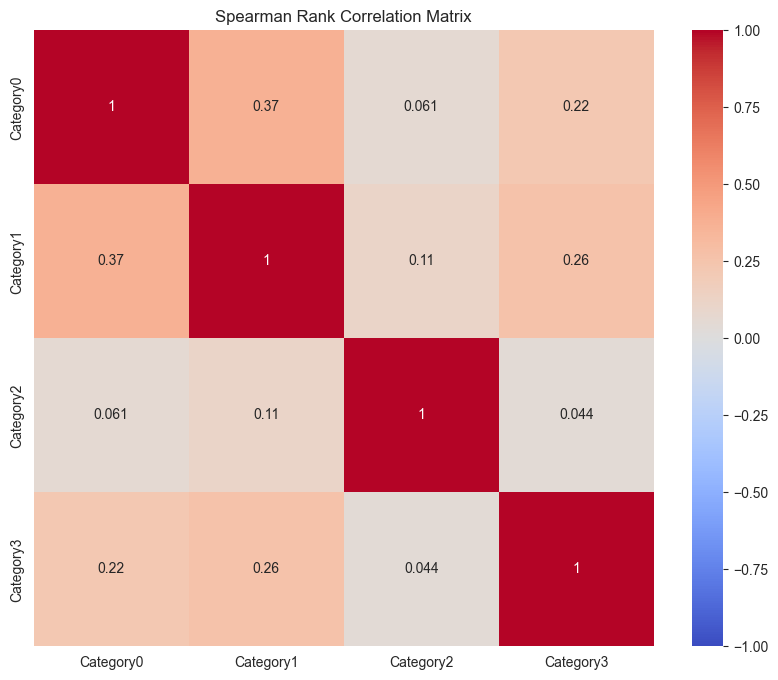

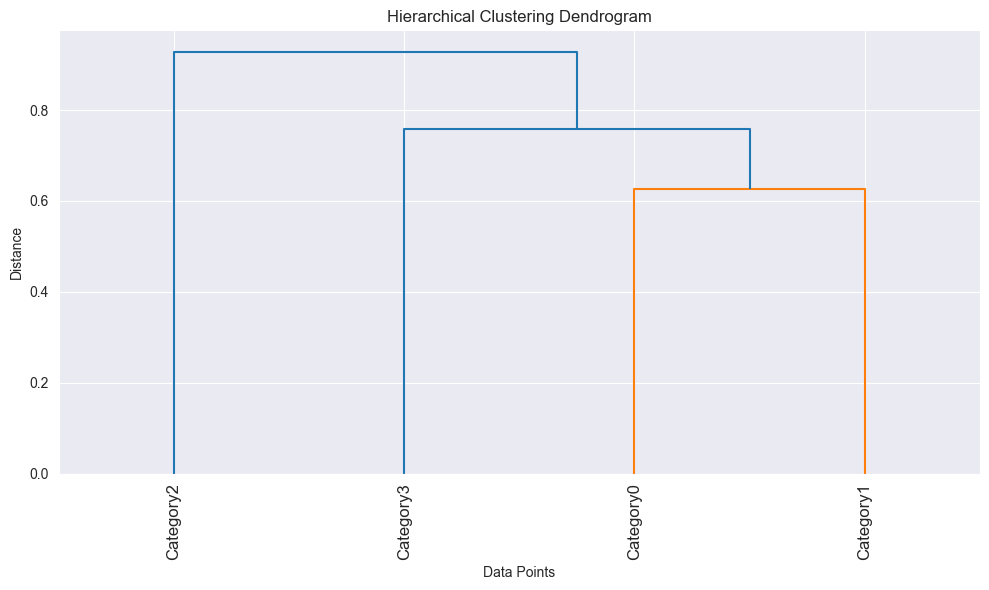

Index 0: 枝江青梗散花
Index 1: 紫白菜(1)
Index 2: 西兰花
Index 3: 青梗散花
单类每日茄类


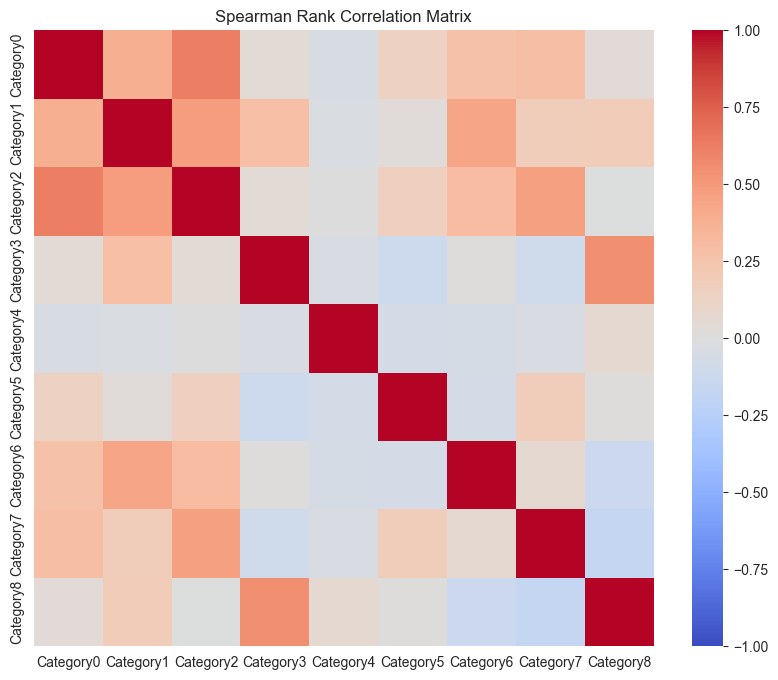

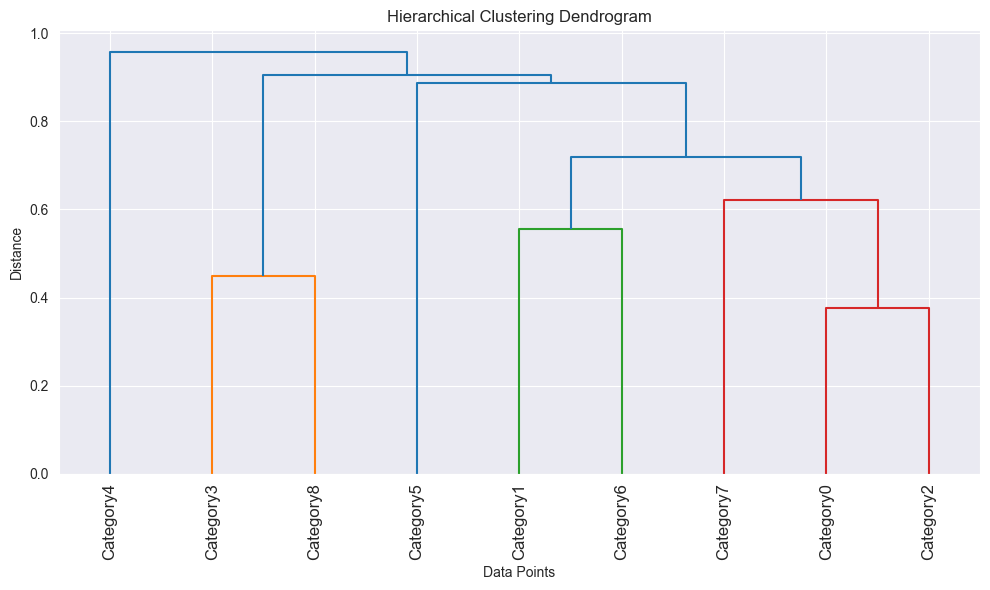

Index 0: 圆茄子(2)
Index 1: 大龙茄子
Index 2: 紫圆茄
Index 3: 紫茄子(1)
Index 4: 紫茄子(2)
Index 5: 花茄子
Index 6: 长线茄
Index 7: 青茄子(1)
Index 8: 青茄子(2)
单类每日辣椒类


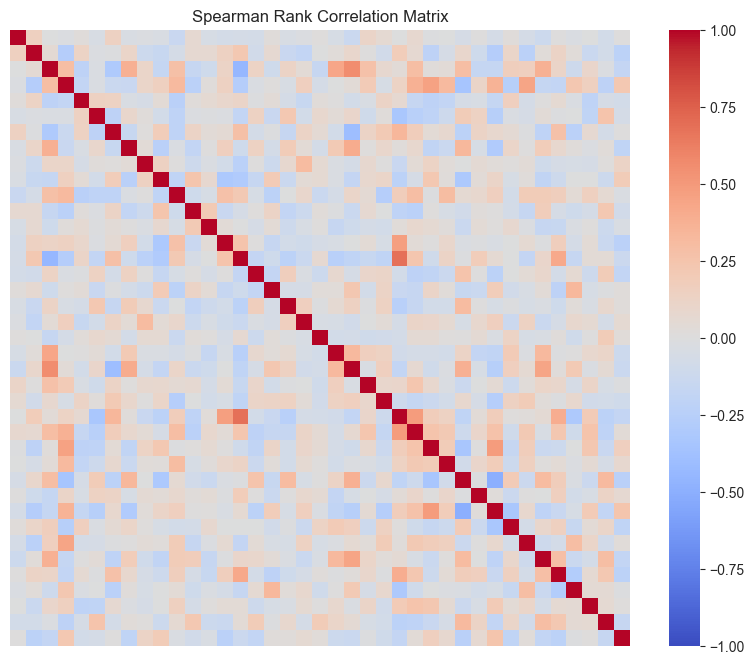

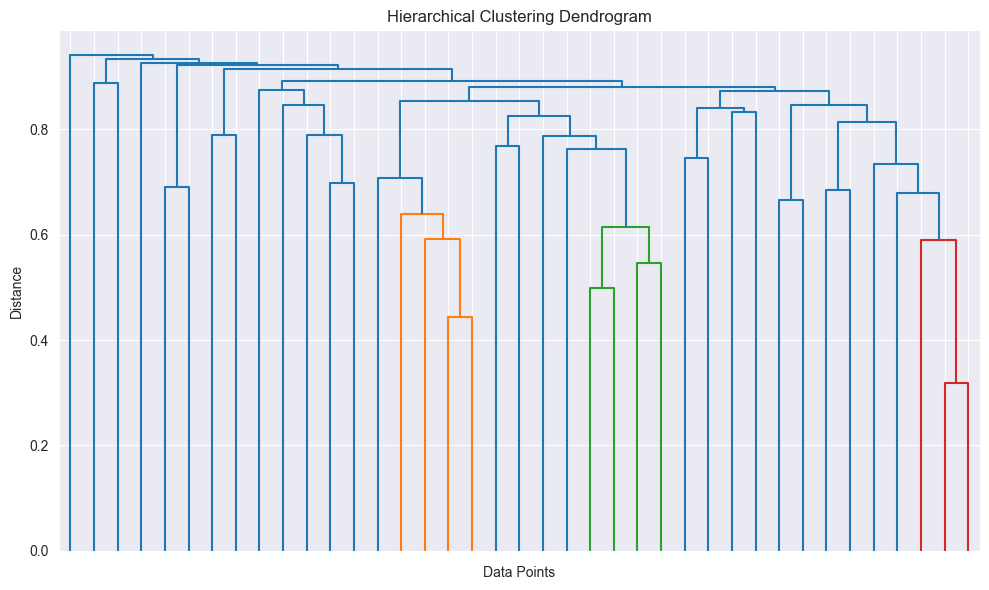

Index 0: 七彩椒(1)
Index 1: 七彩椒(2)
Index 2: 七彩椒(份)
Index 3: 余干椒
Index 4: 姜蒜小米椒组合装(小份)
Index 5: 小皱皮(份)
Index 6: 小皱皮
Index 7: 小米椒(份)
Index 8: 小米椒
Index 9: 水果辣椒(份)
Index 10: 水果辣椒
Index 11: 泡泡椒(精品)
Index 12: 灯笼椒(1)
Index 13: 灯笼椒(2)
Index 14: 紫螺丝椒
Index 15: 红尖椒(份)
Index 16: 红尖椒
Index 17: 红杭椒(份)
Index 18: 红杭椒
Index 19: 红椒(1)
Index 20: 红椒(2)
Index 21: 红椒(份)
Index 22: 红灯笼椒(1)
Index 23: 红灯笼椒(2)
Index 24: 红灯笼椒(份)
Index 25: 红线椒
Index 26: 组合椒系列
Index 27: 芜湖青椒(1)
Index 28: 螺丝椒(份)
Index 29: 螺丝椒
Index 30: 辣妹子
Index 31: 青尖椒(份)
Index 32: 青尖椒
Index 33: 青杭椒(2)
Index 34: 青杭椒(份)
Index 35: 青红尖椒组合装(份)
Index 36: 青红杭椒组合装(份)
Index 37: 青线椒(份)
Index 38: 青线椒
单类每日食用菌


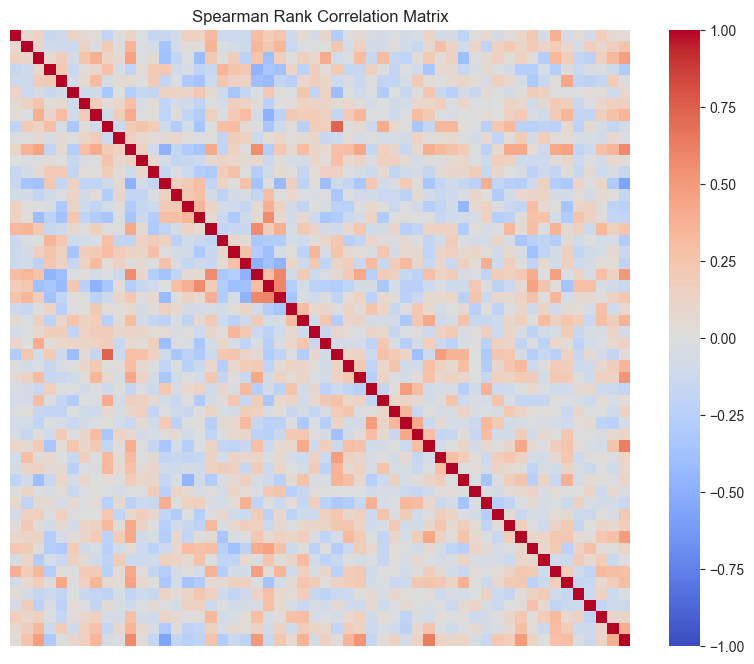

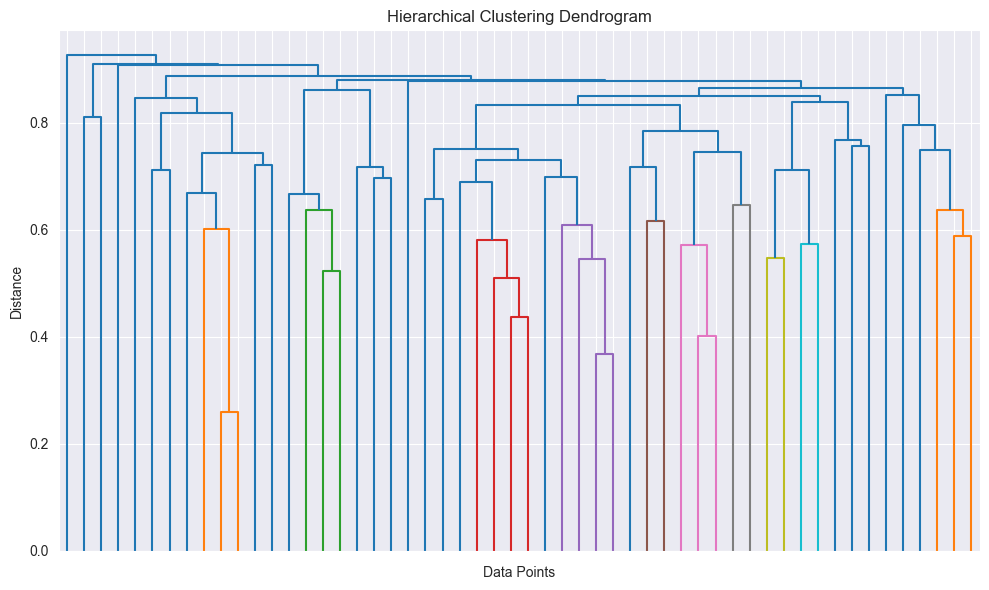

Index 0: 双孢菇(盒)
Index 1: 双孢菇
Index 2: 和丰阳光海鲜菇(包)
Index 3: 姬菇(1)
Index 4: 姬菇(2)
Index 5: 姬菇(份)
Index 6: 姬菇(包)
Index 7: 平菇
Index 8: 杏鲍菇(1)
Index 9: 杏鲍菇(2)
Index 10: 杏鲍菇(份)
Index 11: 杏鲍菇(袋)
Index 12: 海鲜菇(1)
Index 13: 海鲜菇(2)
Index 14: 海鲜菇(份)
Index 15: 海鲜菇(包)
Index 16: 海鲜菇(袋)(1)
Index 17: 海鲜菇(袋)(2)
Index 18: 海鲜菇(袋)(3)
Index 19: 海鲜菇(袋)(4)
Index 20: 牛排菇(盒)
Index 21: 牛排菇
Index 22: 猪肚菇(盒)
Index 23: 白玉菇(1)
Index 24: 白玉菇(2)
Index 25: 白玉菇(盒)
Index 26: 白玉菇(袋)
Index 27: 秀珍菇
Index 28: 绣球菌
Index 29: 茶树菇(袋)
Index 30: 虫草花(份)
Index 31: 虫草花(袋)
Index 32: 虫草花
Index 33: 蟹味菇(1)
Index 34: 蟹味菇(2)
Index 35: 蟹味菇(盒)
Index 36: 蟹味菇(袋)
Index 37: 蟹味菇与白玉菇双拼(盒)
Index 38: 西峡花菇(1)
Index 39: 西峡花菇(2)
Index 40: 西峡香菇(1)
Index 41: 西峡香菇(2)
Index 42: 西峡香菇(份)
Index 43: 金针菇(1)
Index 44: 金针菇(2)
Index 45: 金针菇(盒)
Index 46: 金针菇(袋)(1)
Index 47: 金针菇(袋)(2)
Index 48: 金针菇(袋)(3)
Index 49: 银耳(朵)
Index 50: 鲜木耳(1)
Index 51: 鲜木耳(2)
Index 52: 鲜木耳(份)
Index 53: 黑皮鸡枞菌
单类每月水生根茎类


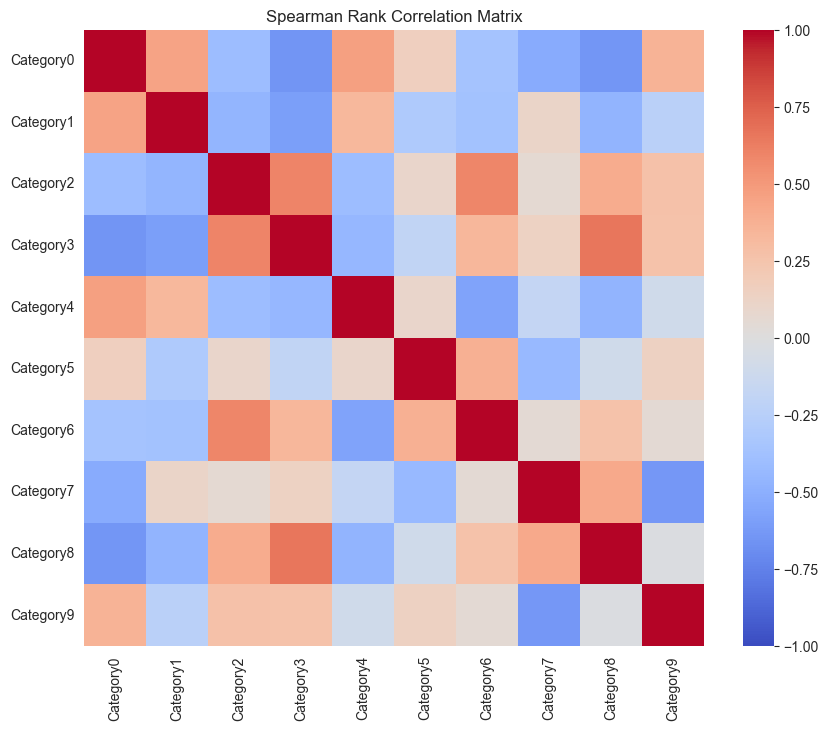

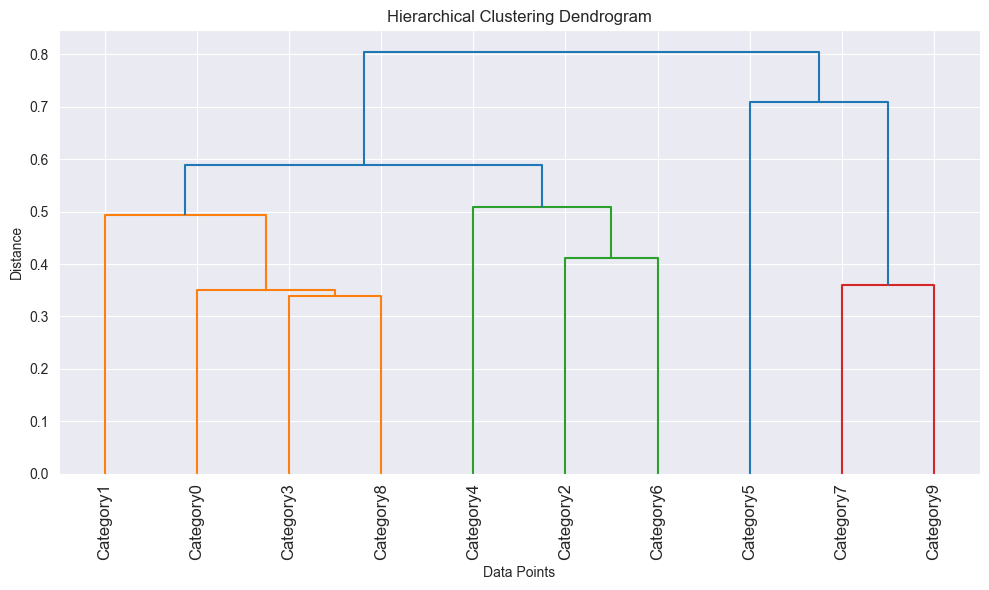

Index 0: 净藕(1)
Index 1: 洪湖莲藕(粉藕)
Index 2: 洪湖藕带
Index 3: 红莲藕带
Index 4: 荸荠
Index 5: 莲蓬(个)
Index 6: 菱角
Index 7: 野藕(1)
Index 8: 高瓜(1)
Index 9: 高瓜(2)
单类每月花叶类


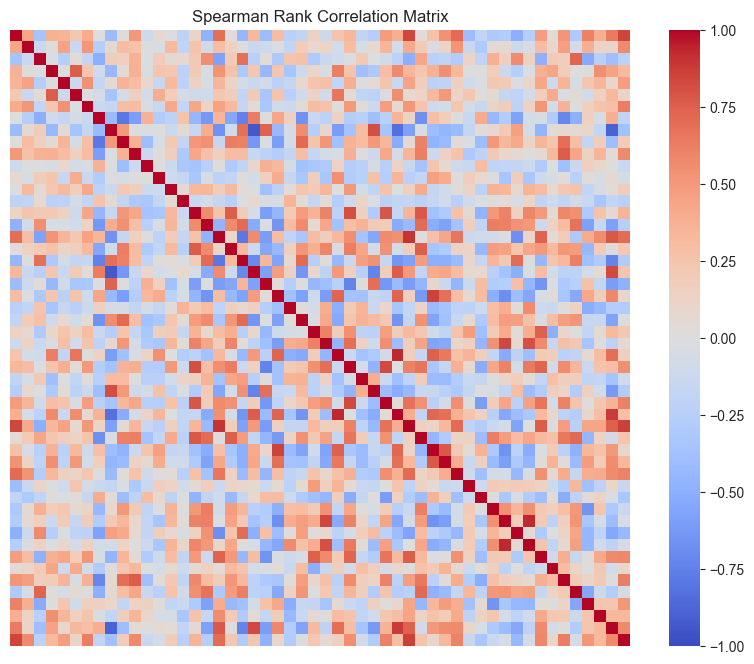

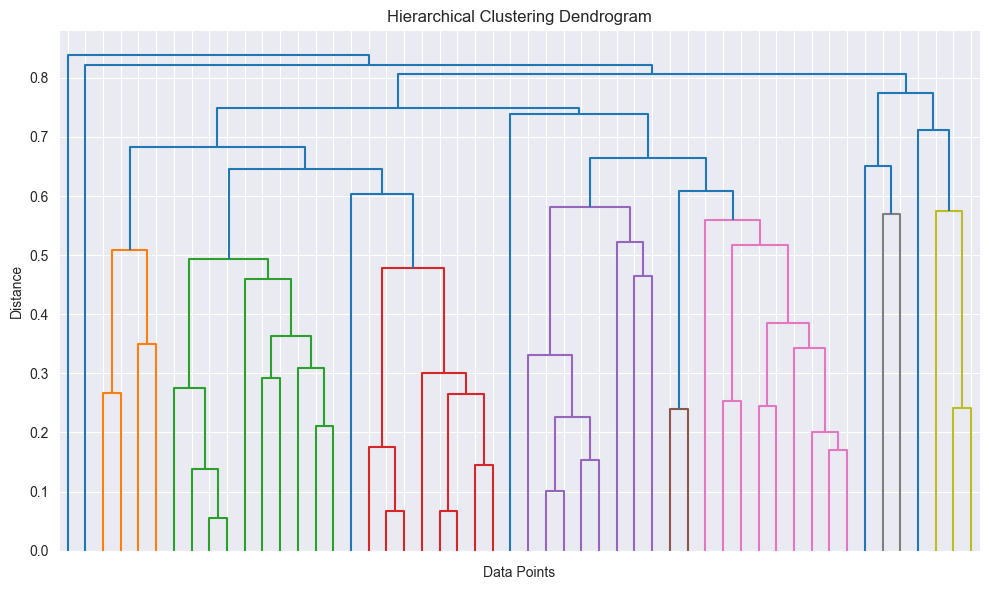

Index 0: 上海青(份)
Index 1: 上海青
Index 2: 东门口小白菜
Index 3: 云南油麦菜(份)
Index 4: 云南油麦菜
Index 5: 云南生菜(份)
Index 6: 云南生菜
Index 7: 保康高山大白菜
Index 8: 冰草(盒)
Index 9: 四川红香椿
Index 10: 外地茼蒿
Index 11: 大白菜
Index 12: 奶白菜(份)
Index 13: 奶白菜
Index 14: 娃娃菜
Index 15: 小白菜
Index 16: 小青菜(1)
Index 17: 小青菜(份)
Index 18: 木耳菜
Index 19: 本地上海青
Index 20: 本地黄心油菜
Index 21: 枝江红菜苔
Index 22: 牛首油菜
Index 23: 牛首生菜
Index 24: 甜白菜
Index 25: 田七
Index 26: 白菜苔
Index 27: 竹叶菜(份)
Index 28: 竹叶菜
Index 29: 紫苏
Index 30: 紫贝菜
Index 31: 红薯尖
Index 32: 芥菜
Index 33: 苋菜(份)
Index 34: 苋菜
Index 35: 茼蒿
Index 36: 菜心(份)
Index 37: 菜心
Index 38: 菠菜(份)
Index 39: 菠菜
Index 40: 萝卜叶
Index 41: 蒲公英
Index 42: 蔡甸藜蒿
Index 43: 薄荷叶
Index 44: 豌豆尖
Index 45: 随州泡泡青
Index 46: 面条菜
Index 47: 马齿苋
Index 48: 鱼腥草(份)
Index 49: 黄心菜(1)
Index 50: 黄心菜(2)
Index 51: 黄白菜(2)
单类每月花菜类


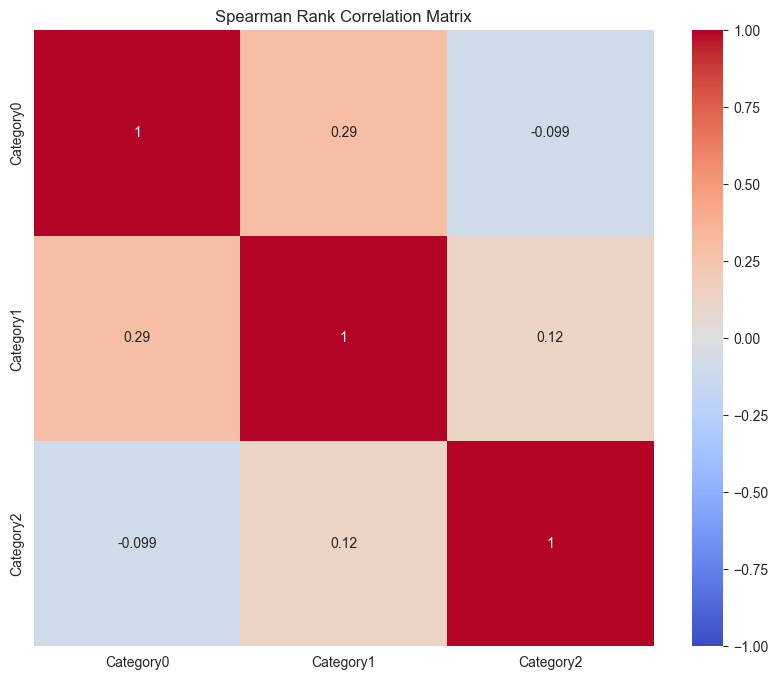

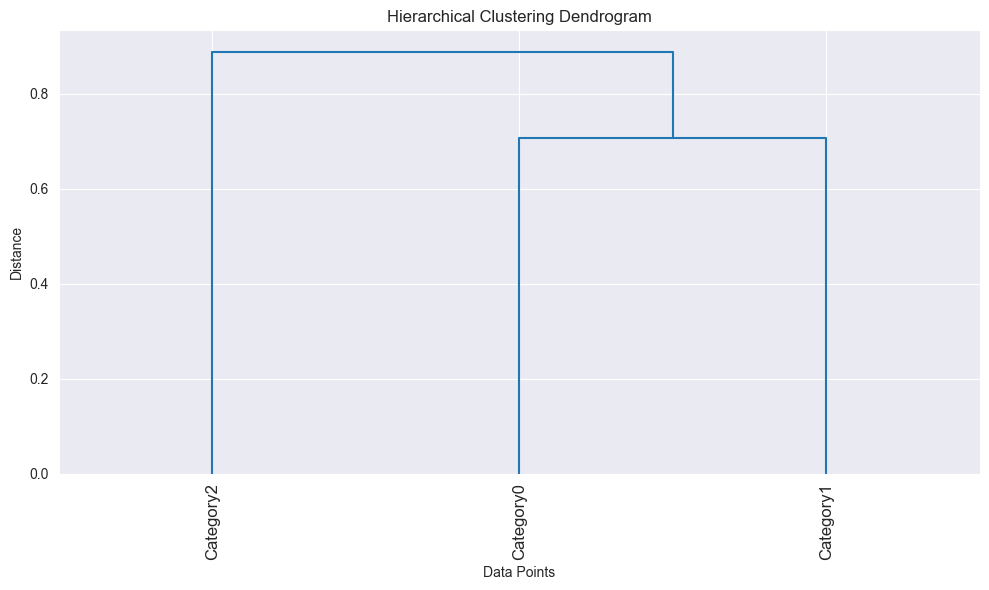

Index 0: 枝江青梗散花
Index 1: 西兰花
Index 2: 青梗散花
单类每月茄类


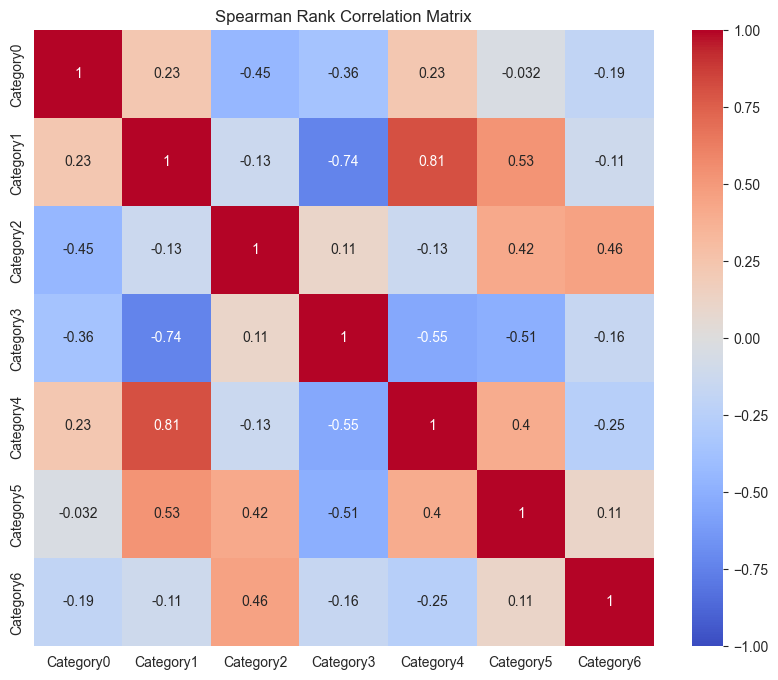

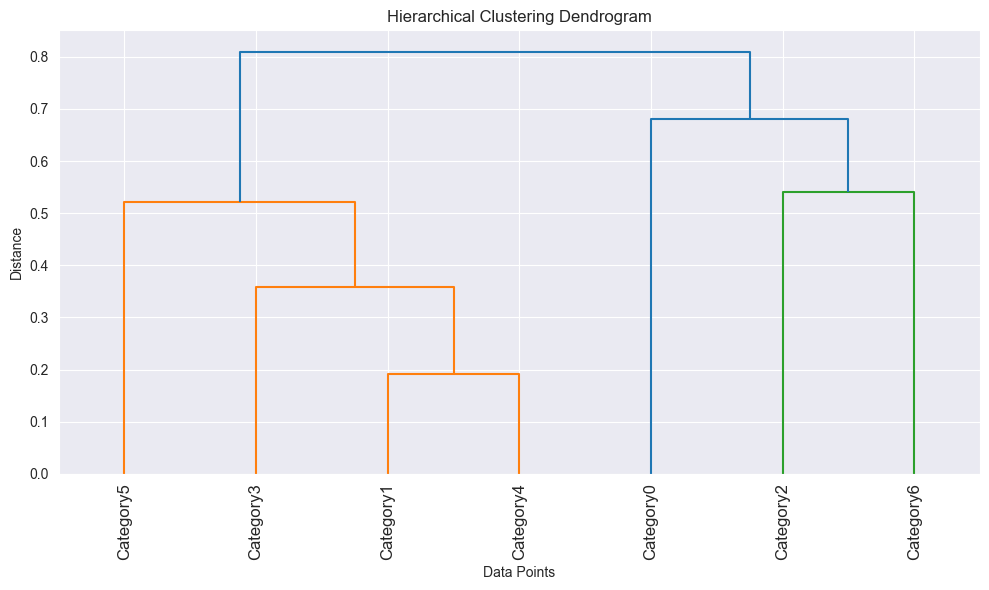

Index 0: 圆茄子(2)
Index 1: 大龙茄子
Index 2: 紫茄子(2)
Index 3: 花茄子
Index 4: 长线茄
Index 5: 青茄子(1)
Index 6: 青茄子(2)
单类每月辣椒类


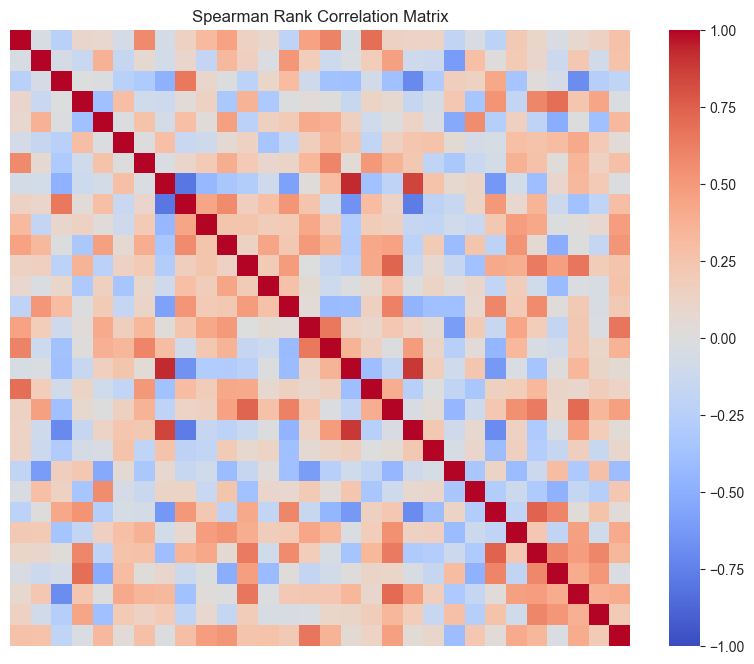

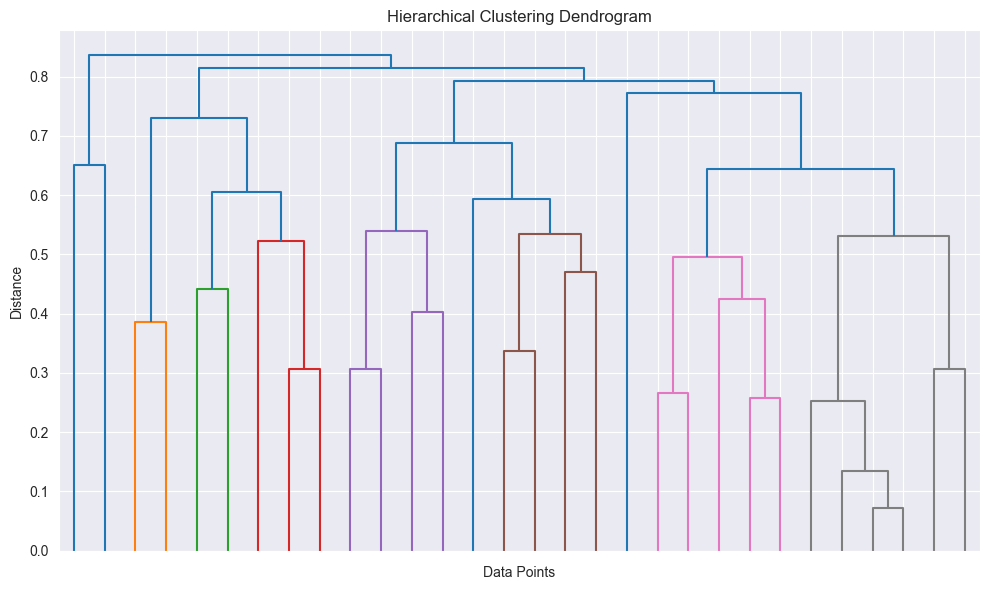

Index 0: 七彩椒(1)
Index 1: 七彩椒(2)
Index 2: 姜蒜小米椒组合装(小份)
Index 3: 小皱皮(份)
Index 4: 小皱皮
Index 5: 小米椒(份)
Index 6: 小米椒
Index 7: 水果辣椒(份)
Index 8: 泡泡椒(精品)
Index 9: 灯笼椒(1)
Index 10: 灯笼椒(2)
Index 11: 红尖椒(份)
Index 12: 红尖椒
Index 13: 红杭椒(份)
Index 14: 红杭椒
Index 15: 红椒(1)
Index 16: 红椒(2)
Index 17: 红灯笼椒(1)
Index 18: 红灯笼椒(2)
Index 19: 组合椒系列
Index 20: 芜湖青椒(1)
Index 21: 螺丝椒(份)
Index 22: 螺丝椒
Index 23: 青尖椒(份)
Index 24: 青尖椒
Index 25: 青杭椒(2)
Index 26: 青杭椒(份)
Index 27: 青红杭椒组合装(份)
Index 28: 青线椒(份)
Index 29: 青线椒
单类每月食用菌


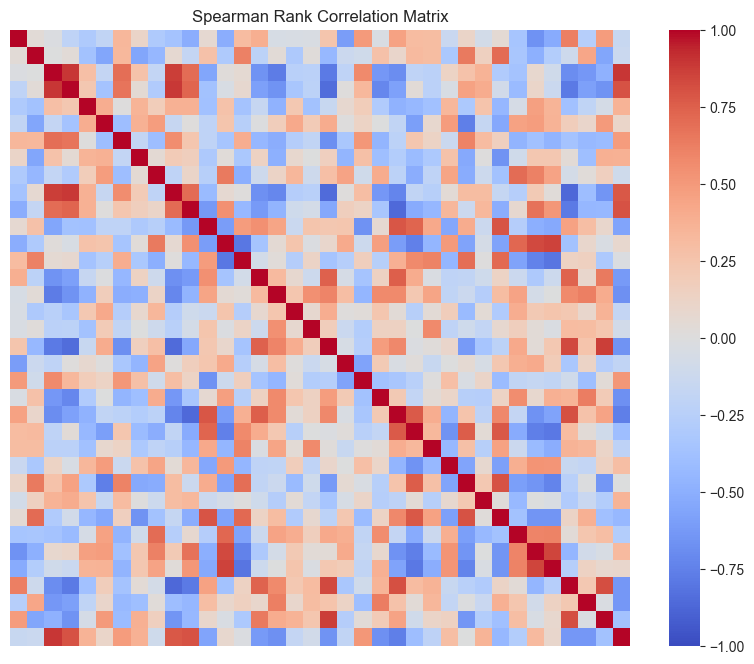

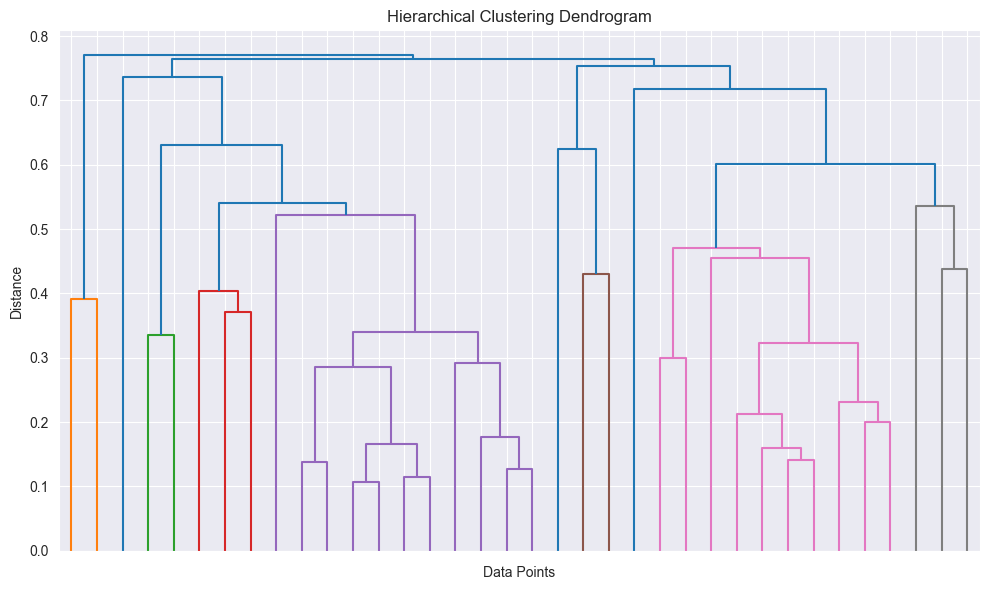

Index 0: 双孢菇(盒)
Index 1: 双孢菇
Index 2: 姬菇(1)
Index 3: 姬菇(份)
Index 4: 姬菇(包)
Index 5: 平菇
Index 6: 杏鲍菇(1)
Index 7: 杏鲍菇(2)
Index 8: 杏鲍菇(袋)
Index 9: 海鲜菇(1)
Index 10: 海鲜菇(份)
Index 11: 海鲜菇(包)
Index 12: 海鲜菇(袋)(1)
Index 13: 海鲜菇(袋)(3)
Index 14: 海鲜菇(袋)(4)
Index 15: 牛排菇(盒)
Index 16: 白玉菇(袋)
Index 17: 虫草花(份)
Index 18: 虫草花(袋)
Index 19: 虫草花
Index 20: 蟹味菇(1)
Index 21: 蟹味菇(2)
Index 22: 蟹味菇(袋)
Index 23: 蟹味菇与白玉菇双拼(盒)
Index 24: 西峡花菇(1)
Index 25: 西峡香菇(1)
Index 26: 西峡香菇(2)
Index 27: 金针菇(1)
Index 28: 金针菇(2)
Index 29: 金针菇(盒)
Index 30: 金针菇(袋)(1)
Index 31: 金针菇(袋)(2)
Index 32: 金针菇(袋)(3)
Index 33: 银耳(朵)
Index 34: 鲜木耳(1)
Index 35: 鲜木耳(份)
品类每日


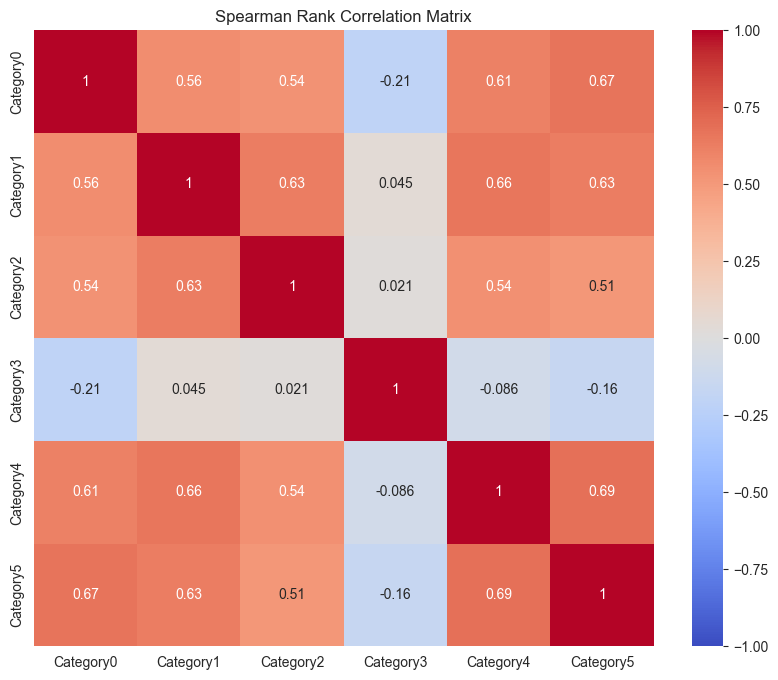

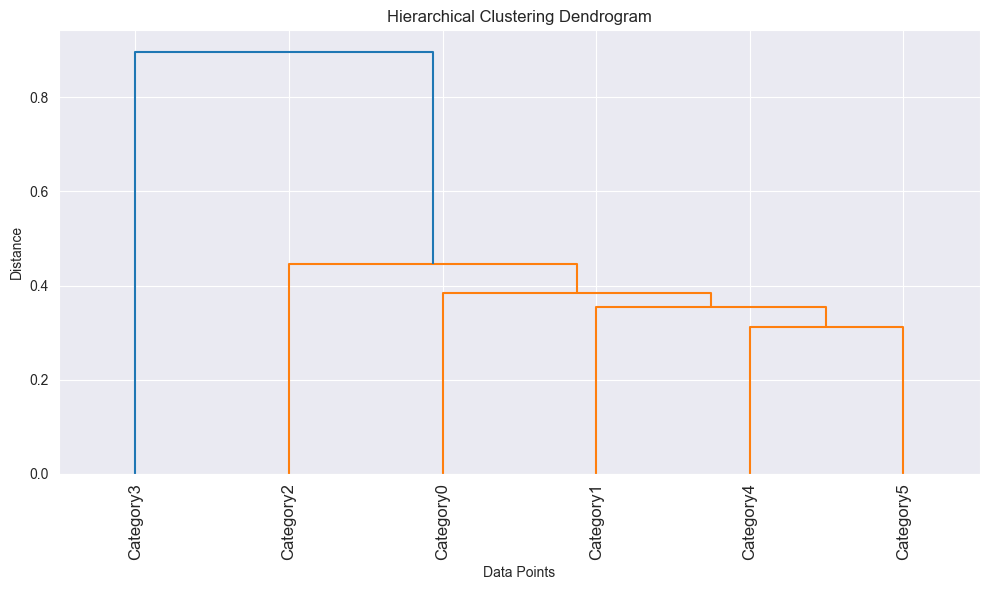

Index 0: 水生根茎类
Index 1: 花叶类
Index 2: 花菜类
Index 3: 茄类
Index 4: 辣椒类
Index 5: 食用菌
品类每月


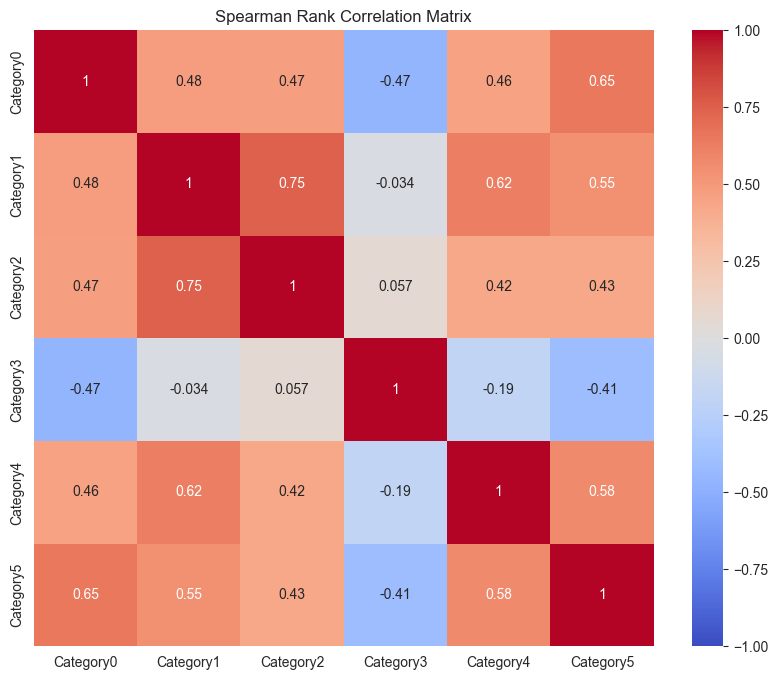

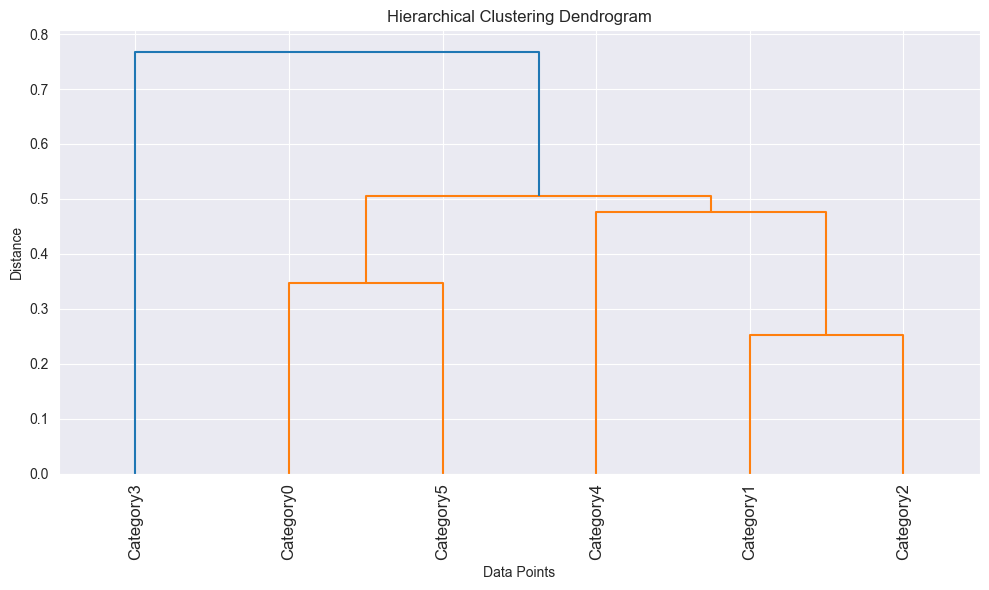

Index 0: 水生根茎类
Index 1: 花叶类
Index 2: 花菜类
Index 3: 茄类
Index 4: 辣椒类
Index 5: 食用菌


In [83]:
intern1_lst = ['单类', '品类']
intern2_lst = ['每日', '每月']
# 自定义行和列的标签
chosenThreshold = 0.5

for intern1 in intern1_lst:

    for intern2 in intern2_lst:
        if intern1 == '单类':
            for key, item in pearson_corr_matrices[intern1][intern2].items():
                print(f"{intern1}{intern2}{key}")
                drawCorrMatrixHotMap(item, r'D:\Git\国赛\result\Q1\interpolated', f"{intern1}_{intern2}_{key}_相关性矩阵.jpg")
                clusterFromCorrMatrix(item, chosenThreshold, r'D:\Git\国赛\result\Q1\interpolated', f"{intern1}_{intern2}_{key}_相关性分组映射.txt")
        else:
            print(f"{intern1}{intern2}")
            drawCorrMatrixHotMap(pearson_corr_matrices[intern1][intern2], r'D:\Git\国赛\result\Q1\interpolated', f"{intern1}_{intern2}_相关性矩阵.jpg")
            clusterFromCorrMatrix(pearson_corr_matrices[intern1][intern2], chosenThreshold, r'D:\Git\国赛\result\Q1\interpolated', f"{intern1}_{intern2}_相关性分组映射.txt")

# drawCorrMatrixHotMap(pearson_corr_matrix, 'D:\Git\国赛\picture', 'test_interpolation.jpg')

#### 绘制归一化数据的热力图和层次聚类的树状图

单类每日水生根茎类


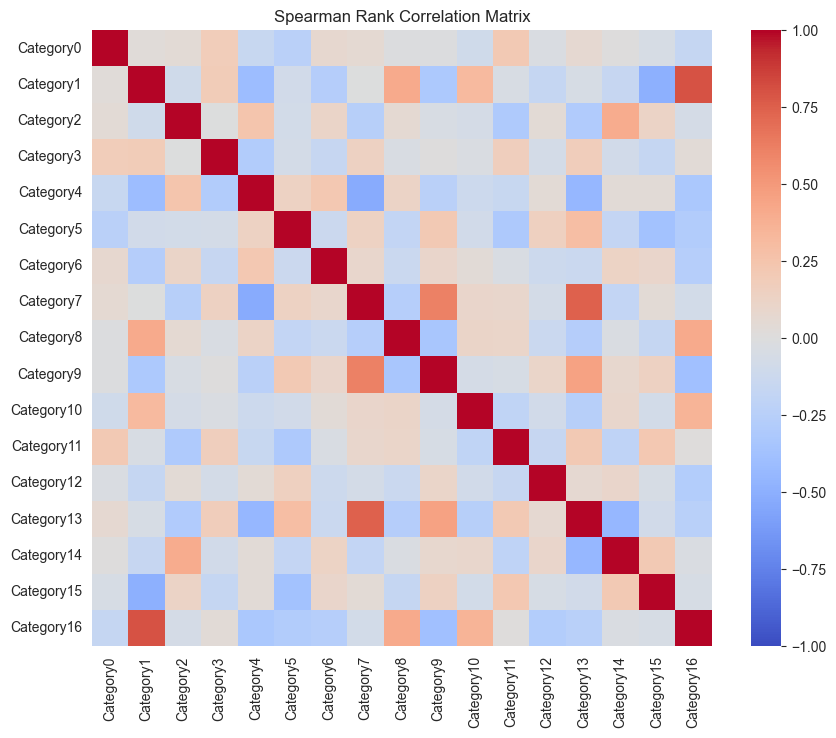

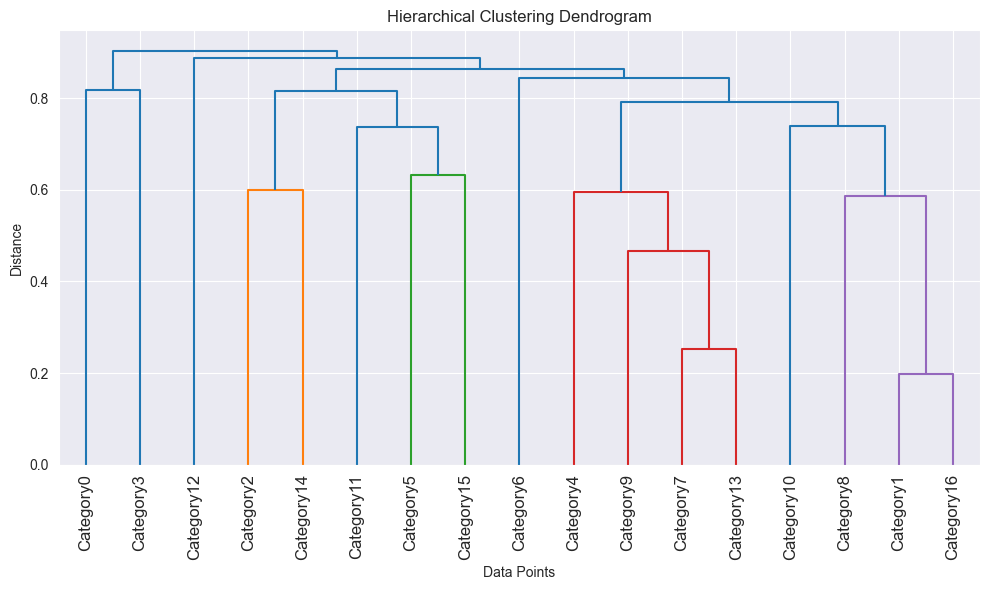

Index 0: 净藕(1)
Index 1: 净藕(2)
Index 2: 净藕(3)
Index 3: 洪湖莲藕(粉藕)
Index 4: 洪湖莲藕(脆藕)
Index 5: 洪湖藕带
Index 6: 红莲藕带
Index 7: 荸荠(份)
Index 8: 荸荠
Index 9: 莲蓬(个)
Index 10: 菱角
Index 11: 野生粉藕
Index 12: 野藕(1)
Index 13: 野藕(2)
Index 14: 高瓜(1)
Index 15: 高瓜(2)
Index 16: 鲜藕带(袋)
单类每日花叶类


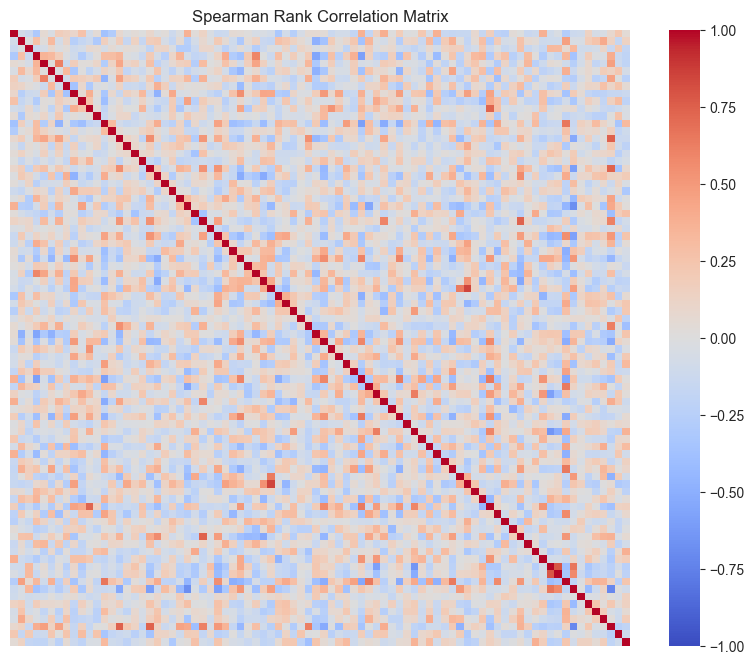

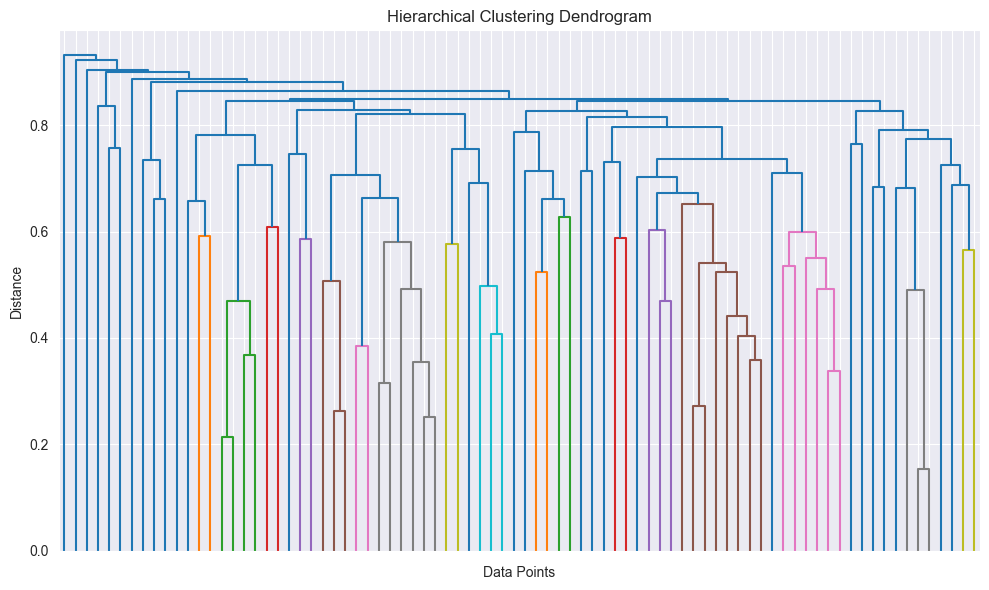

Index 0: 上海青(份)
Index 1: 上海青
Index 2: 东门口小白菜
Index 3: 丝瓜尖
Index 4: 云南油麦菜(份)
Index 5: 云南油麦菜
Index 6: 云南生菜(份)
Index 7: 云南生菜
Index 8: 保康高山大白菜
Index 9: 冰草(盒)
Index 10: 冰草
Index 11: 四川红香椿
Index 12: 外地茼蒿(份)
Index 13: 外地茼蒿
Index 14: 大白菜
Index 15: 奶白菜(份)
Index 16: 奶白菜
Index 17: 娃娃菜
Index 18: 小白菜(份)
Index 19: 小白菜
Index 20: 小青菜(1)
Index 21: 小青菜(2)
Index 22: 小青菜(份)
Index 23: 快菜
Index 24: 春菜
Index 25: 木耳菜(份)
Index 26: 木耳菜
Index 27: 本地上海青
Index 28: 本地小毛白菜
Index 29: 本地黄心油菜
Index 30: 枝江红菜苔(份)
Index 31: 枝江红菜苔
Index 32: 槐花
Index 33: 油菜苔
Index 34: 洪山菜苔
Index 35: 牛首油菜
Index 36: 牛首生菜
Index 37: 甜白菜
Index 38: 田七
Index 39: 白菜苔
Index 40: 白蒿
Index 41: 竹叶菜(份)
Index 42: 竹叶菜
Index 43: 紫苏(份)
Index 44: 紫苏
Index 45: 紫贝菜
Index 46: 红薯尖(份)
Index 47: 红薯尖
Index 48: 芥菜
Index 49: 苋菜(份)
Index 50: 苋菜
Index 51: 茼蒿(份)
Index 52: 茼蒿
Index 53: 荠菜
Index 54: 菜心(份)
Index 55: 菜心
Index 56: 菠菜(份)
Index 57: 菠菜
Index 58: 萝卜叶
Index 59: 蒲公英
Index 60: 蔡甸藜蒿(份)
Index 61: 蔡甸藜蒿
Index 62: 薄荷叶
Index 63: 襄甜红菜苔(袋)
Index 64: 豌豆尖
Index 65: 随州泡泡青
Inde

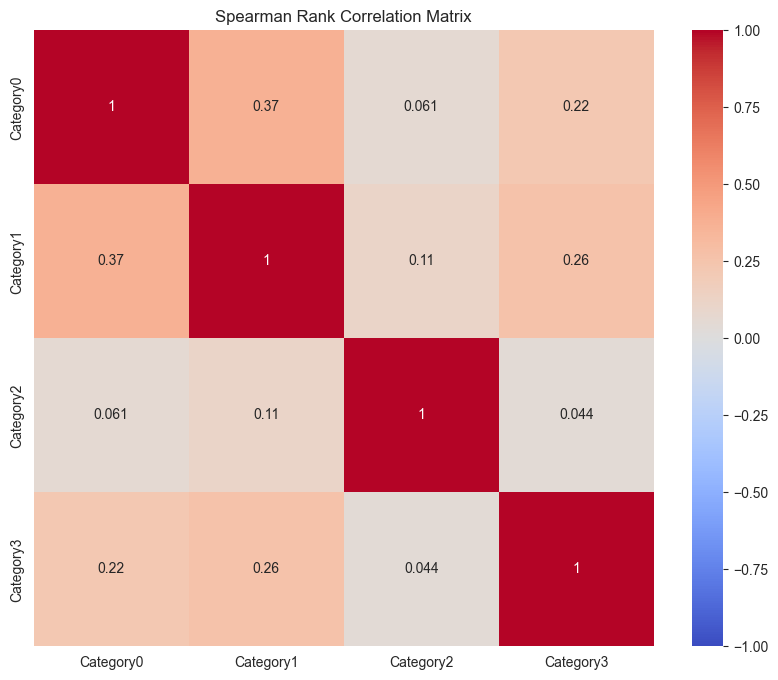

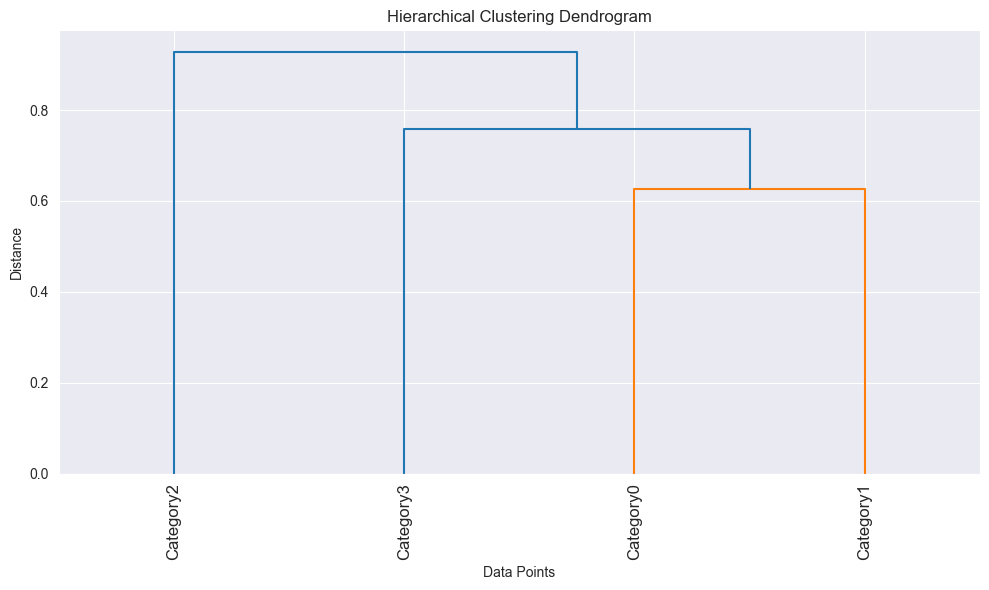

Index 0: 枝江青梗散花
Index 1: 紫白菜(1)
Index 2: 西兰花
Index 3: 青梗散花
单类每日茄类


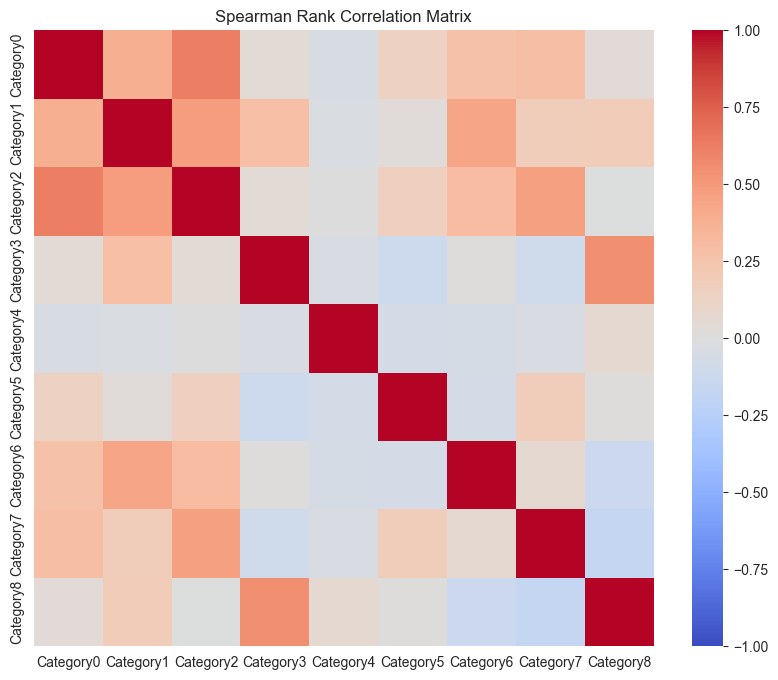

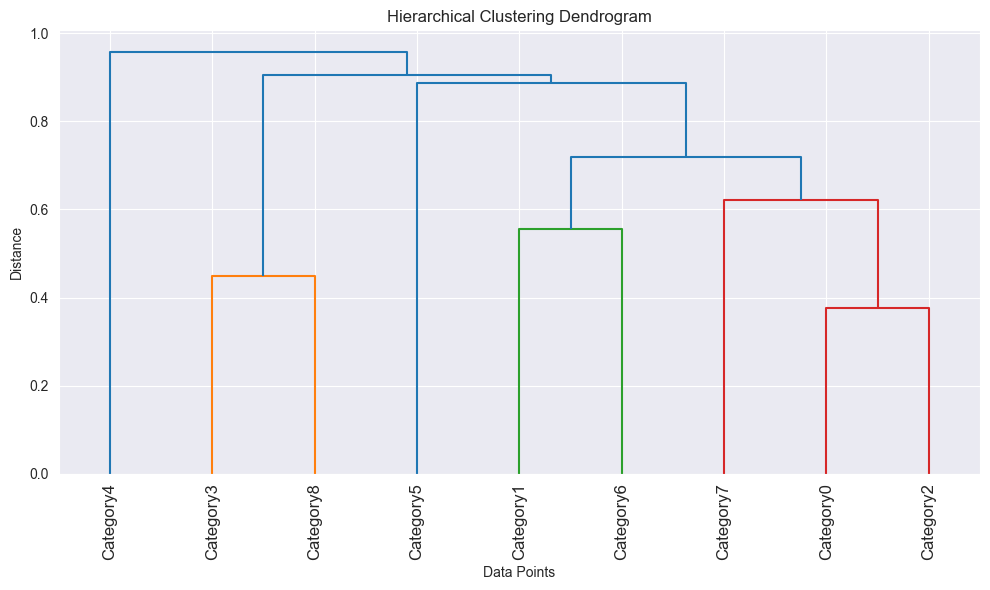

Index 0: 圆茄子(2)
Index 1: 大龙茄子
Index 2: 紫圆茄
Index 3: 紫茄子(1)
Index 4: 紫茄子(2)
Index 5: 花茄子
Index 6: 长线茄
Index 7: 青茄子(1)
Index 8: 青茄子(2)
单类每日辣椒类


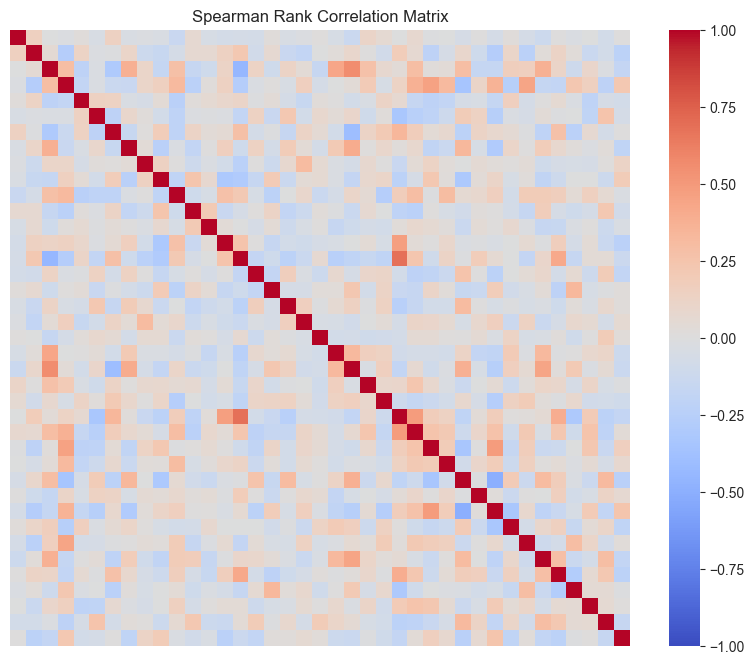

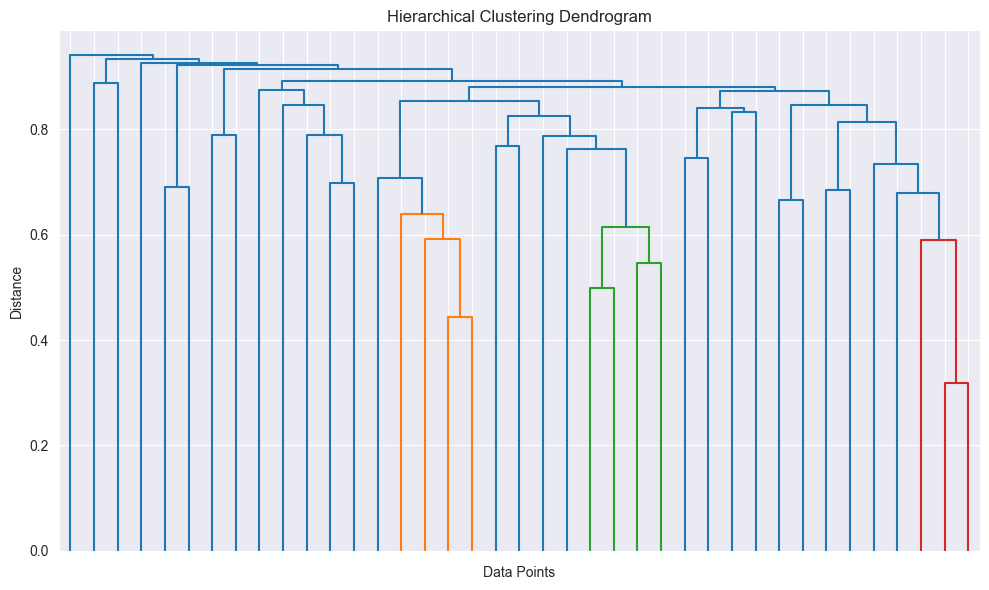

Index 0: 七彩椒(1)
Index 1: 七彩椒(2)
Index 2: 七彩椒(份)
Index 3: 余干椒
Index 4: 姜蒜小米椒组合装(小份)
Index 5: 小皱皮(份)
Index 6: 小皱皮
Index 7: 小米椒(份)
Index 8: 小米椒
Index 9: 水果辣椒(份)
Index 10: 水果辣椒
Index 11: 泡泡椒(精品)
Index 12: 灯笼椒(1)
Index 13: 灯笼椒(2)
Index 14: 紫螺丝椒
Index 15: 红尖椒(份)
Index 16: 红尖椒
Index 17: 红杭椒(份)
Index 18: 红杭椒
Index 19: 红椒(1)
Index 20: 红椒(2)
Index 21: 红椒(份)
Index 22: 红灯笼椒(1)
Index 23: 红灯笼椒(2)
Index 24: 红灯笼椒(份)
Index 25: 红线椒
Index 26: 组合椒系列
Index 27: 芜湖青椒(1)
Index 28: 螺丝椒(份)
Index 29: 螺丝椒
Index 30: 辣妹子
Index 31: 青尖椒(份)
Index 32: 青尖椒
Index 33: 青杭椒(2)
Index 34: 青杭椒(份)
Index 35: 青红尖椒组合装(份)
Index 36: 青红杭椒组合装(份)
Index 37: 青线椒(份)
Index 38: 青线椒
单类每日食用菌


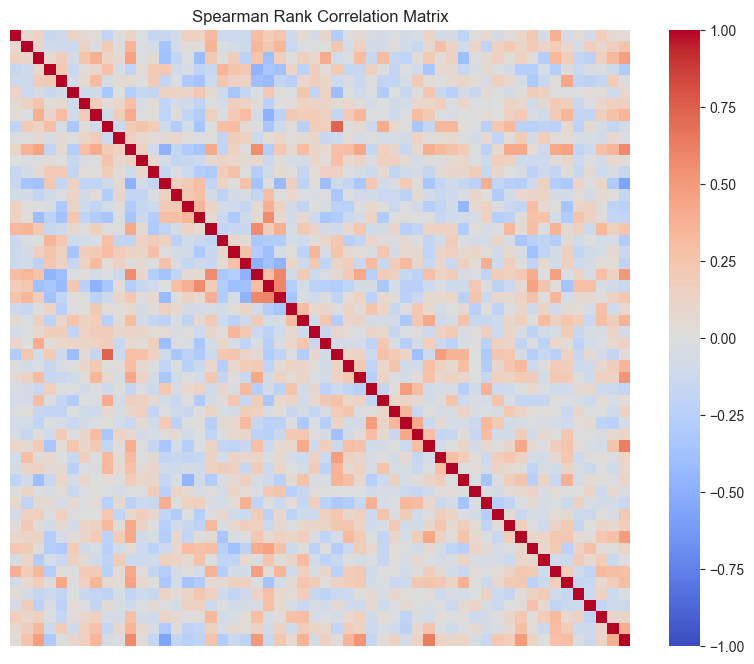

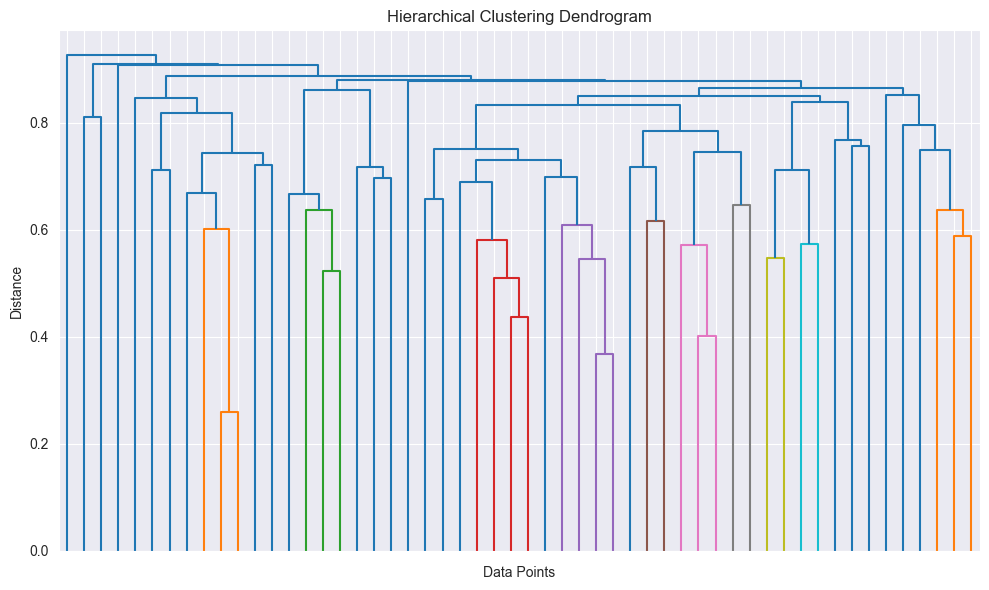

Index 0: 双孢菇(盒)
Index 1: 双孢菇
Index 2: 和丰阳光海鲜菇(包)
Index 3: 姬菇(1)
Index 4: 姬菇(2)
Index 5: 姬菇(份)
Index 6: 姬菇(包)
Index 7: 平菇
Index 8: 杏鲍菇(1)
Index 9: 杏鲍菇(2)
Index 10: 杏鲍菇(份)
Index 11: 杏鲍菇(袋)
Index 12: 海鲜菇(1)
Index 13: 海鲜菇(2)
Index 14: 海鲜菇(份)
Index 15: 海鲜菇(包)
Index 16: 海鲜菇(袋)(1)
Index 17: 海鲜菇(袋)(2)
Index 18: 海鲜菇(袋)(3)
Index 19: 海鲜菇(袋)(4)
Index 20: 牛排菇(盒)
Index 21: 牛排菇
Index 22: 猪肚菇(盒)
Index 23: 白玉菇(1)
Index 24: 白玉菇(2)
Index 25: 白玉菇(盒)
Index 26: 白玉菇(袋)
Index 27: 秀珍菇
Index 28: 绣球菌
Index 29: 茶树菇(袋)
Index 30: 虫草花(份)
Index 31: 虫草花(袋)
Index 32: 虫草花
Index 33: 蟹味菇(1)
Index 34: 蟹味菇(2)
Index 35: 蟹味菇(盒)
Index 36: 蟹味菇(袋)
Index 37: 蟹味菇与白玉菇双拼(盒)
Index 38: 西峡花菇(1)
Index 39: 西峡花菇(2)
Index 40: 西峡香菇(1)
Index 41: 西峡香菇(2)
Index 42: 西峡香菇(份)
Index 43: 金针菇(1)
Index 44: 金针菇(2)
Index 45: 金针菇(盒)
Index 46: 金针菇(袋)(1)
Index 47: 金针菇(袋)(2)
Index 48: 金针菇(袋)(3)
Index 49: 银耳(朵)
Index 50: 鲜木耳(1)
Index 51: 鲜木耳(2)
Index 52: 鲜木耳(份)
Index 53: 黑皮鸡枞菌
单类每月水生根茎类


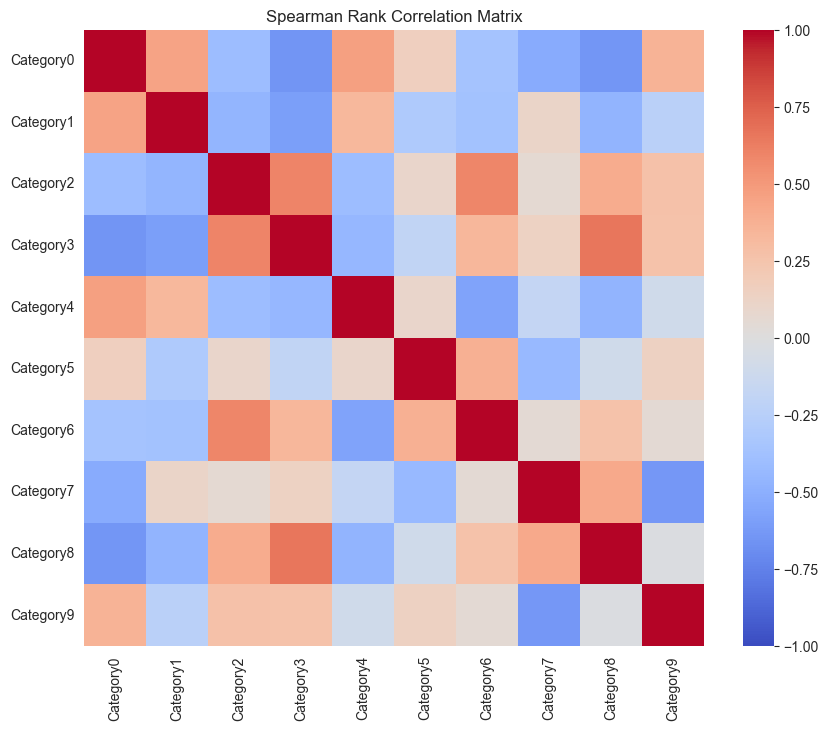

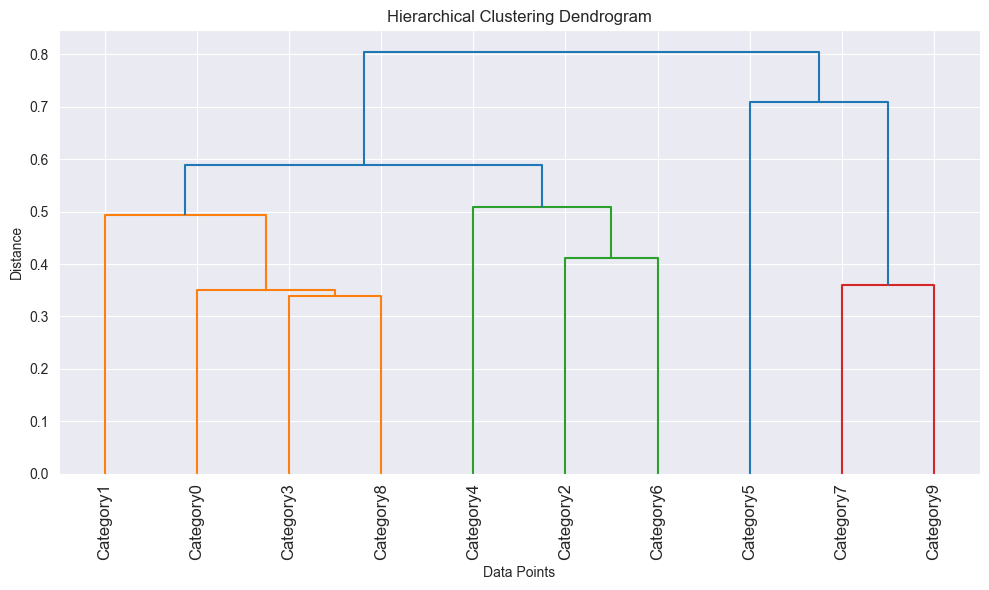

Index 0: 净藕(1)
Index 1: 洪湖莲藕(粉藕)
Index 2: 洪湖藕带
Index 3: 红莲藕带
Index 4: 荸荠
Index 5: 莲蓬(个)
Index 6: 菱角
Index 7: 野藕(1)
Index 8: 高瓜(1)
Index 9: 高瓜(2)
单类每月花叶类


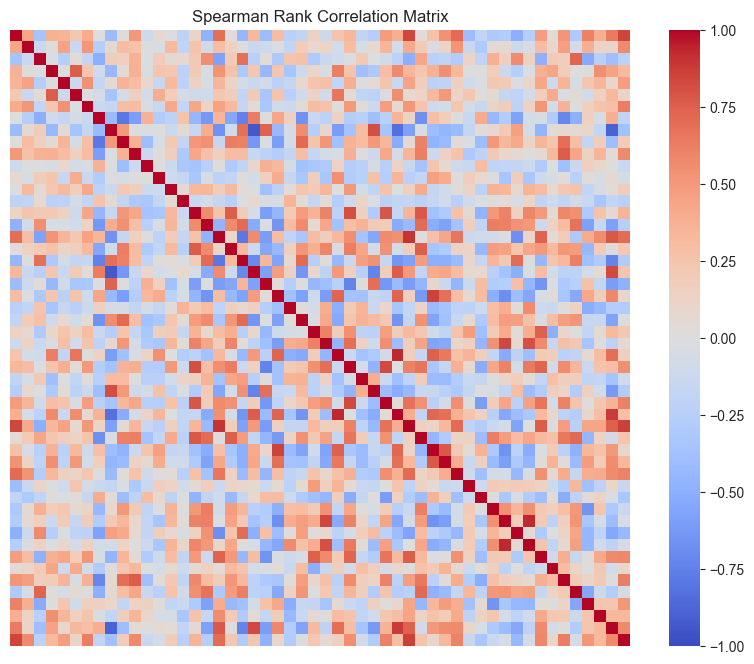

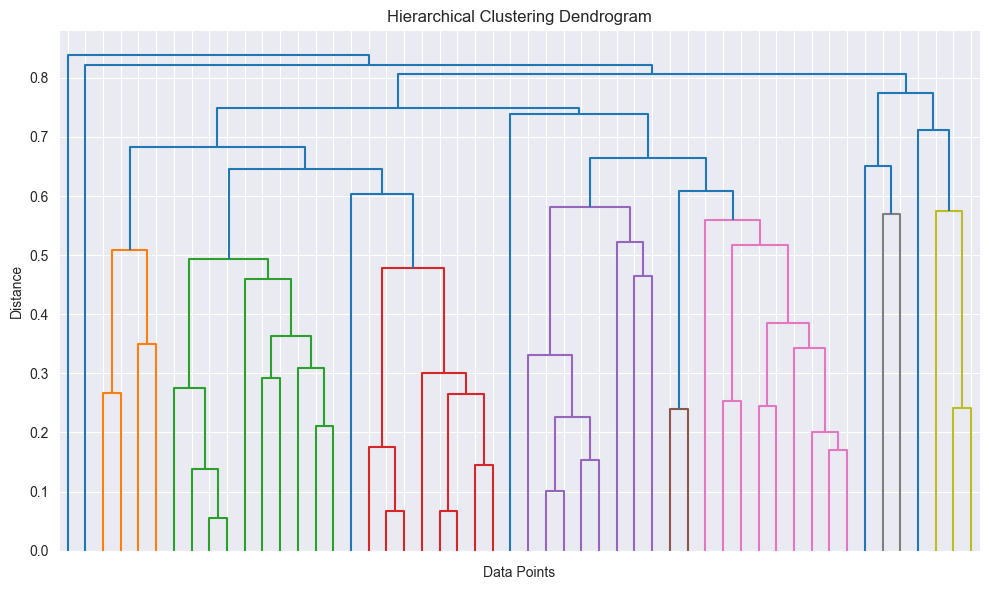

Index 0: 上海青(份)
Index 1: 上海青
Index 2: 东门口小白菜
Index 3: 云南油麦菜(份)
Index 4: 云南油麦菜
Index 5: 云南生菜(份)
Index 6: 云南生菜
Index 7: 保康高山大白菜
Index 8: 冰草(盒)
Index 9: 四川红香椿
Index 10: 外地茼蒿
Index 11: 大白菜
Index 12: 奶白菜(份)
Index 13: 奶白菜
Index 14: 娃娃菜
Index 15: 小白菜
Index 16: 小青菜(1)
Index 17: 小青菜(份)
Index 18: 木耳菜
Index 19: 本地上海青
Index 20: 本地黄心油菜
Index 21: 枝江红菜苔
Index 22: 牛首油菜
Index 23: 牛首生菜
Index 24: 甜白菜
Index 25: 田七
Index 26: 白菜苔
Index 27: 竹叶菜(份)
Index 28: 竹叶菜
Index 29: 紫苏
Index 30: 紫贝菜
Index 31: 红薯尖
Index 32: 芥菜
Index 33: 苋菜(份)
Index 34: 苋菜
Index 35: 茼蒿
Index 36: 菜心(份)
Index 37: 菜心
Index 38: 菠菜(份)
Index 39: 菠菜
Index 40: 萝卜叶
Index 41: 蒲公英
Index 42: 蔡甸藜蒿
Index 43: 薄荷叶
Index 44: 豌豆尖
Index 45: 随州泡泡青
Index 46: 面条菜
Index 47: 马齿苋
Index 48: 鱼腥草(份)
Index 49: 黄心菜(1)
Index 50: 黄心菜(2)
Index 51: 黄白菜(2)
单类每月花菜类


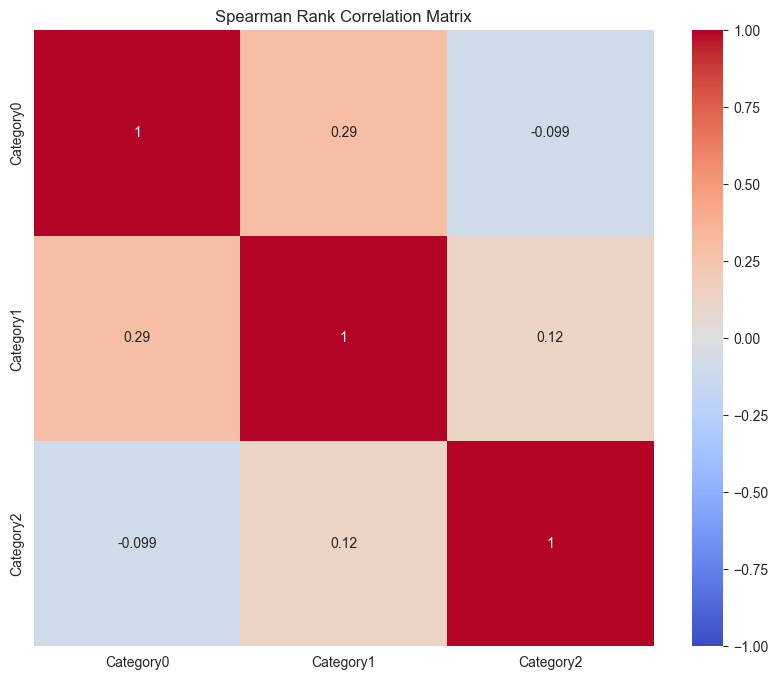

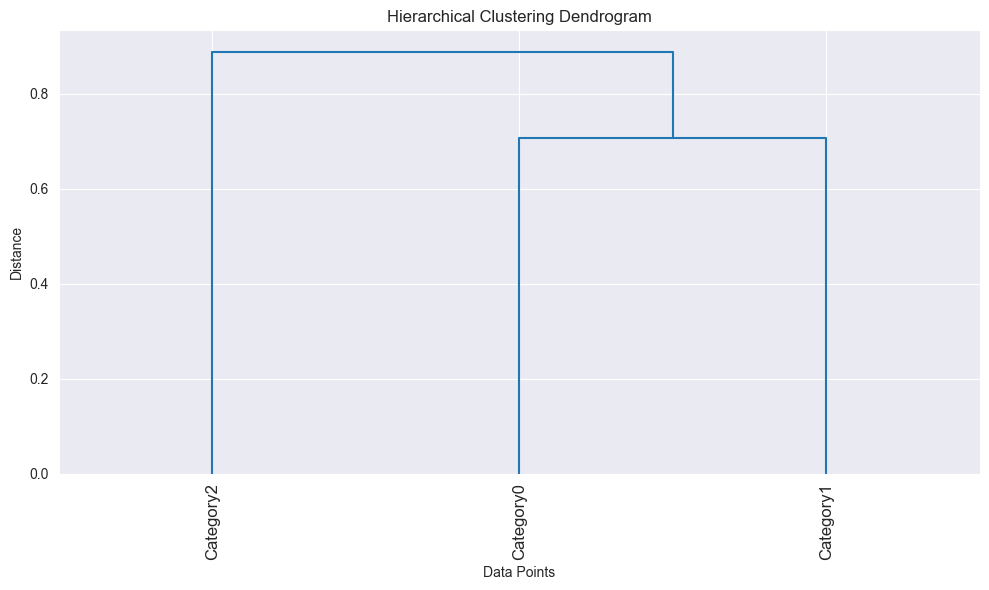

Index 0: 枝江青梗散花
Index 1: 西兰花
Index 2: 青梗散花
单类每月茄类


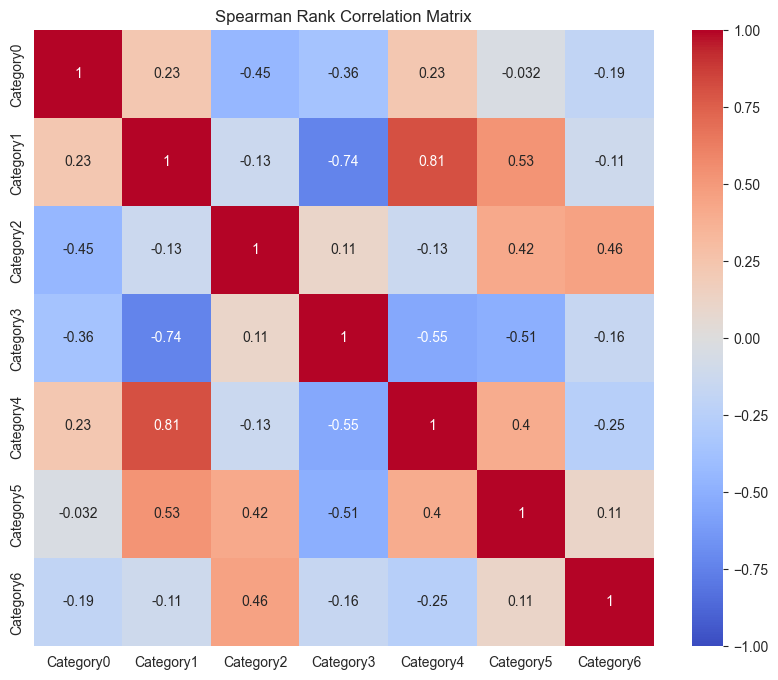

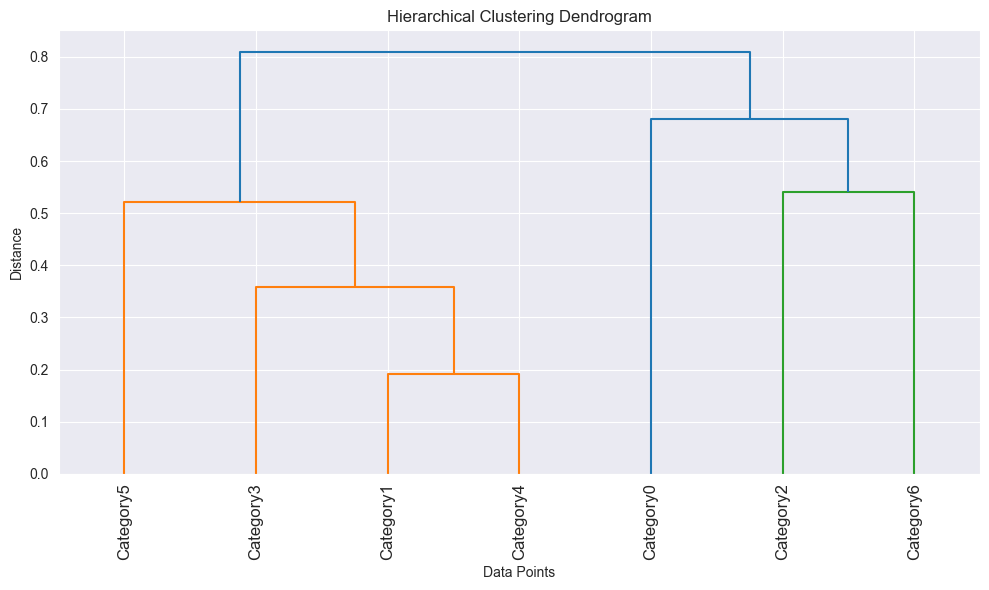

Index 0: 圆茄子(2)
Index 1: 大龙茄子
Index 2: 紫茄子(2)
Index 3: 花茄子
Index 4: 长线茄
Index 5: 青茄子(1)
Index 6: 青茄子(2)
单类每月辣椒类


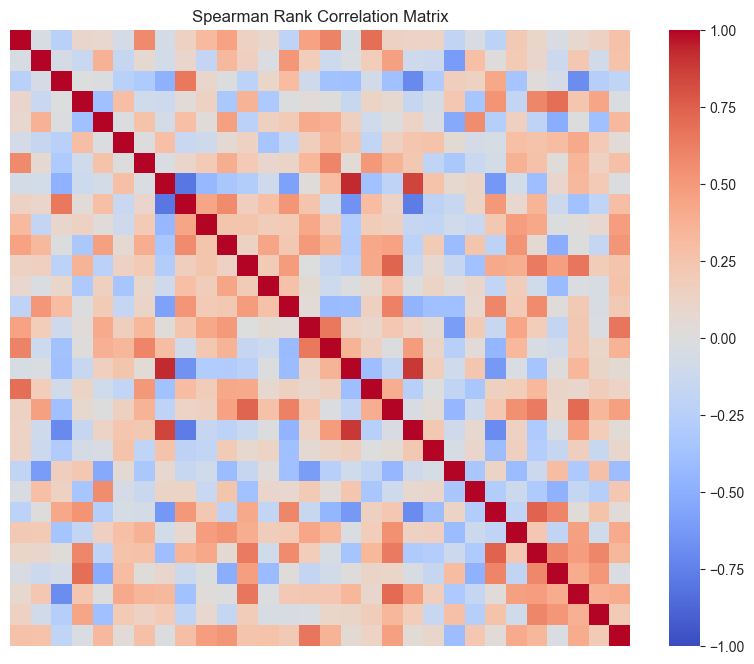

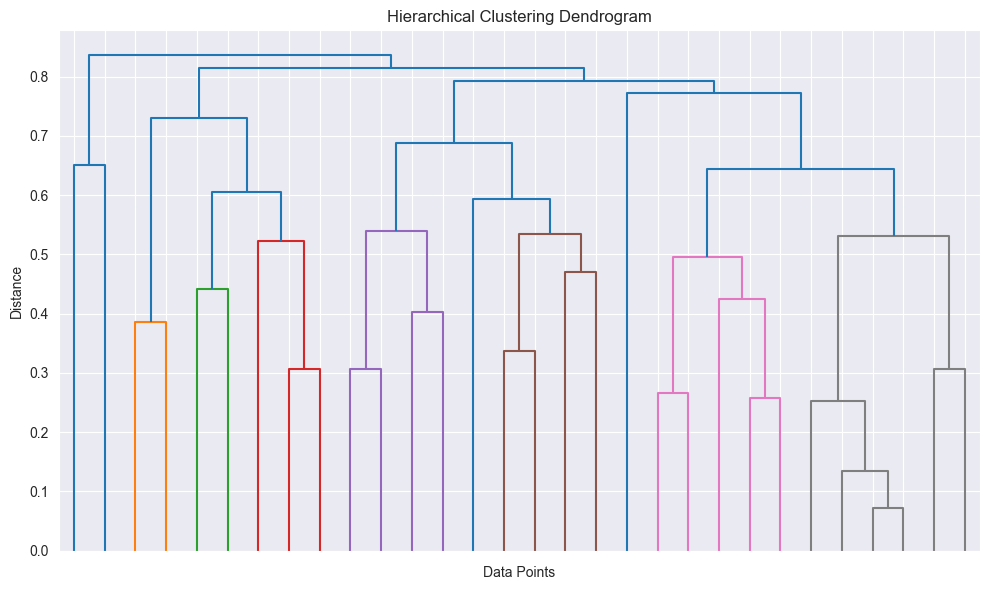

Index 0: 七彩椒(1)
Index 1: 七彩椒(2)
Index 2: 姜蒜小米椒组合装(小份)
Index 3: 小皱皮(份)
Index 4: 小皱皮
Index 5: 小米椒(份)
Index 6: 小米椒
Index 7: 水果辣椒(份)
Index 8: 泡泡椒(精品)
Index 9: 灯笼椒(1)
Index 10: 灯笼椒(2)
Index 11: 红尖椒(份)
Index 12: 红尖椒
Index 13: 红杭椒(份)
Index 14: 红杭椒
Index 15: 红椒(1)
Index 16: 红椒(2)
Index 17: 红灯笼椒(1)
Index 18: 红灯笼椒(2)
Index 19: 组合椒系列
Index 20: 芜湖青椒(1)
Index 21: 螺丝椒(份)
Index 22: 螺丝椒
Index 23: 青尖椒(份)
Index 24: 青尖椒
Index 25: 青杭椒(2)
Index 26: 青杭椒(份)
Index 27: 青红杭椒组合装(份)
Index 28: 青线椒(份)
Index 29: 青线椒
单类每月食用菌


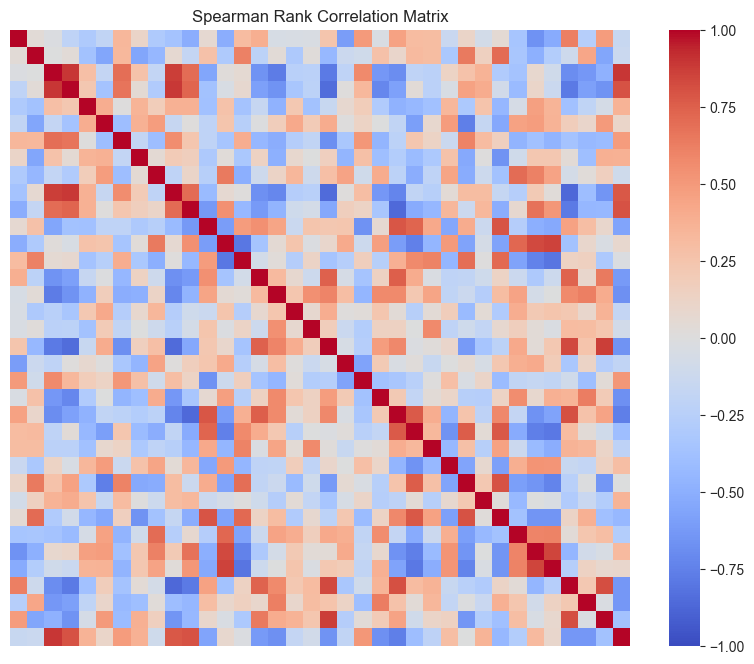

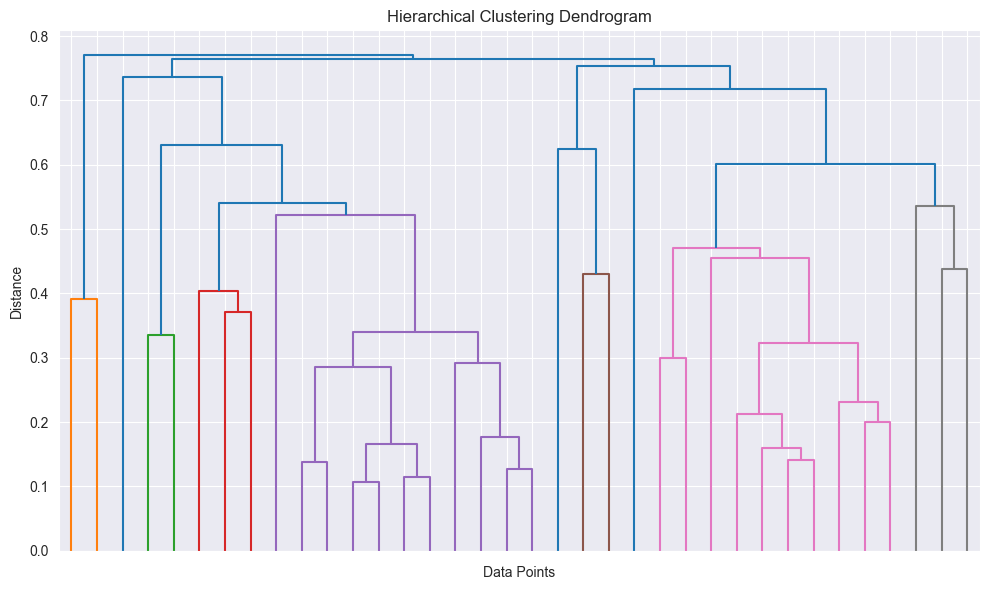

Index 0: 双孢菇(盒)
Index 1: 双孢菇
Index 2: 姬菇(1)
Index 3: 姬菇(份)
Index 4: 姬菇(包)
Index 5: 平菇
Index 6: 杏鲍菇(1)
Index 7: 杏鲍菇(2)
Index 8: 杏鲍菇(袋)
Index 9: 海鲜菇(1)
Index 10: 海鲜菇(份)
Index 11: 海鲜菇(包)
Index 12: 海鲜菇(袋)(1)
Index 13: 海鲜菇(袋)(3)
Index 14: 海鲜菇(袋)(4)
Index 15: 牛排菇(盒)
Index 16: 白玉菇(袋)
Index 17: 虫草花(份)
Index 18: 虫草花(袋)
Index 19: 虫草花
Index 20: 蟹味菇(1)
Index 21: 蟹味菇(2)
Index 22: 蟹味菇(袋)
Index 23: 蟹味菇与白玉菇双拼(盒)
Index 24: 西峡花菇(1)
Index 25: 西峡香菇(1)
Index 26: 西峡香菇(2)
Index 27: 金针菇(1)
Index 28: 金针菇(2)
Index 29: 金针菇(盒)
Index 30: 金针菇(袋)(1)
Index 31: 金针菇(袋)(2)
Index 32: 金针菇(袋)(3)
Index 33: 银耳(朵)
Index 34: 鲜木耳(1)
Index 35: 鲜木耳(份)
品类每日


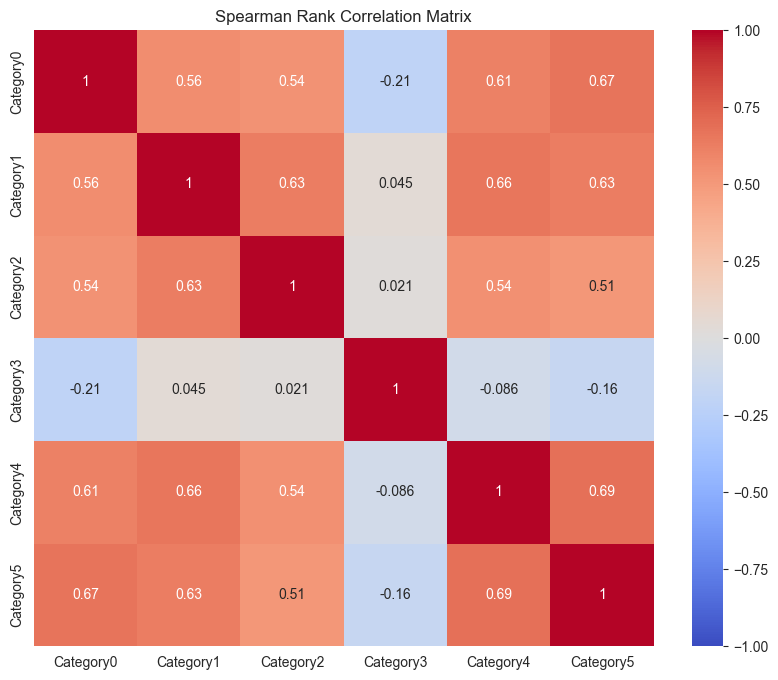

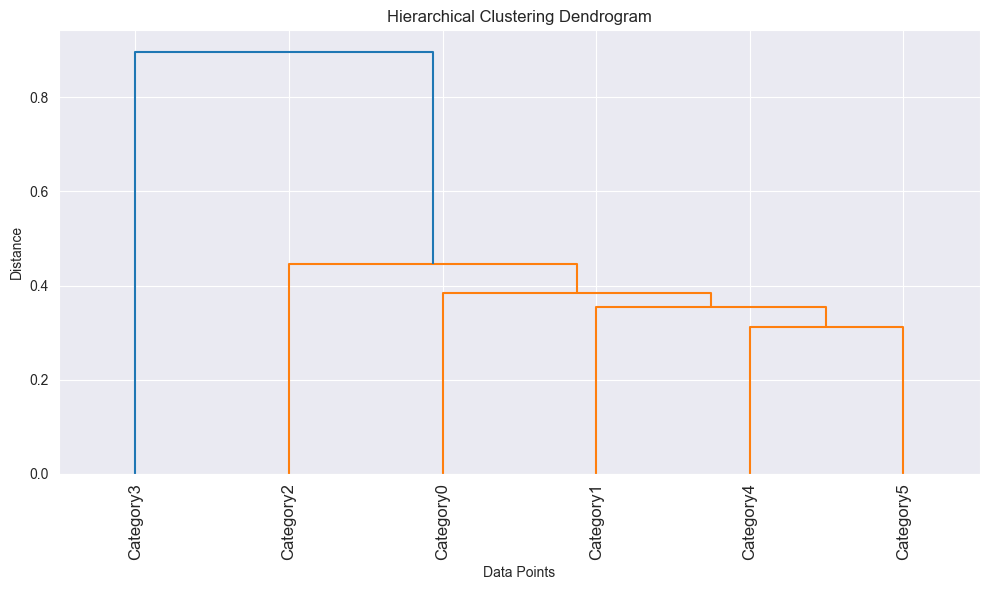

Index 0: 水生根茎类
Index 1: 花叶类
Index 2: 花菜类
Index 3: 茄类
Index 4: 辣椒类
Index 5: 食用菌
品类每月


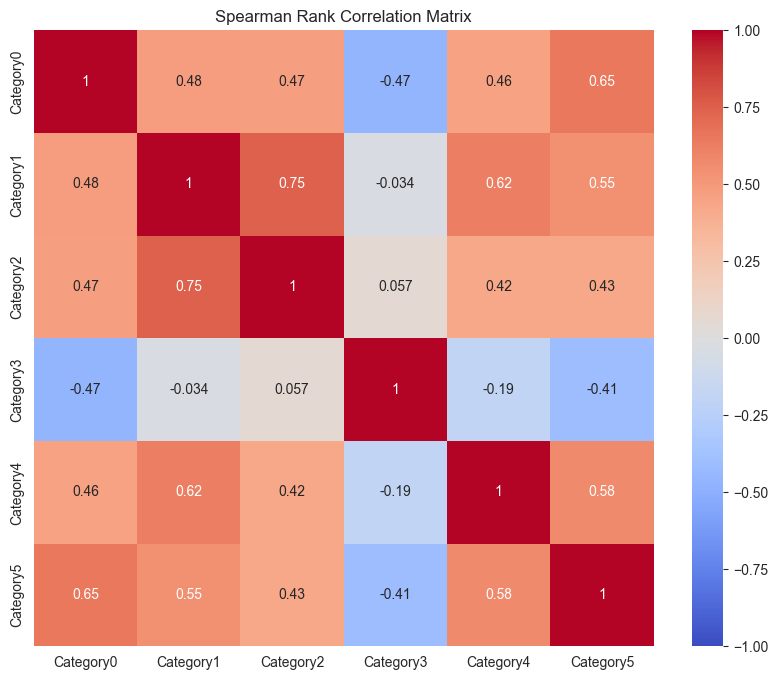

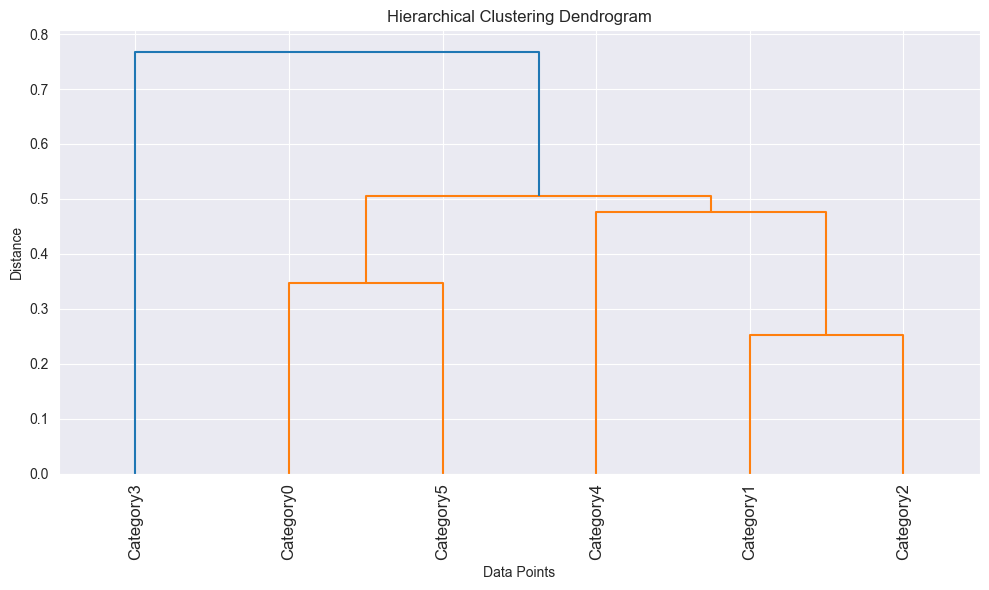

Index 0: 水生根茎类
Index 1: 花叶类
Index 2: 花菜类
Index 3: 茄类
Index 4: 辣椒类
Index 5: 食用菌


In [84]:
standardized_pearson_corr_matrices = calculateDictCorrMatrix(standardized_dict)
intern1_lst = ['单类', '品类']
intern2_lst = ['每日', '每月']
# 自定义行和列的标签
chosenThreshold = 0.5

for intern1 in intern1_lst:

    for intern2 in intern2_lst:
        if intern1 == '单类':
            for key, item in standardized_pearson_corr_matrices[intern1][intern2].items():
                print(f"{intern1}{intern2}{key}")
                drawCorrMatrixHotMap(item, r'D:\Git\国赛\result\Q1\standardized',
                                     f"{intern1}_{intern2}_{key}_相关性矩阵.jpg")
                clusterFromCorrMatrix(item, chosenThreshold, r'D:\Git\国赛\result\Q1\standardized',
                                      f"{intern1}_{intern2}_{key}_相关性分组映射.txt")
        else:
            print(f"{intern1}{intern2}")
            drawCorrMatrixHotMap(standardized_pearson_corr_matrices[intern1][intern2], r'D:\Git\国赛\result\Q1\standardized',
                                 f"{intern1}_{intern2}_相关性矩阵.jpg")
            clusterFromCorrMatrix(standardized_pearson_corr_matrices[intern1][intern2], chosenThreshold,
                                  r'D:\Git\国赛\result\Q1\standardized', f"{intern1}_{intern2}_相关性分组映射.txt")


# DUBUG（无需运行，仅供调试）

In [12]:
# 创建示例数据集
data = {
    'Category1': np.random.rand(100),
    'Category2': np.random.rand(100),
    'Category3': np.random.rand(100),
    'Category4': np.random.rand(100),
    'Category5': np.random.rand(100),
    'Category6': np.random.rand(100)
}

# 为不同类别之间增加一定的相关性
data['Category2'] += 0.6 * data['Category1']
data['Category3'] -= 0.2 * data['Category1'] + 0.4 * data['Category2']
data['Category4'] += 0.6 * data['Category2']
data['Category5'] -= 0.6 * data['Category3'] - 0.4 * data['Category1']
data['Category6'] += 0.8 * data['Category4'] + 0.5 * data['Category3']

df = pd.DataFrame(data)


In [13]:
# 计算Pearson相关性矩阵
pearson_corr_matrix = df.corr(method='pearson')
print("Pearson相关性矩阵：")
print(pearson_corr_matrix)


Pearson相关性矩阵：
           Category1  Category2  Category3  Category4  Category5  Category6
Category1   1.000000   0.400469  -0.384872   0.174232   0.547803  -0.112605
Category2   0.400469   1.000000  -0.534521   0.663319   0.446110   0.169961
Category3  -0.384872  -0.534521   1.000000  -0.313032  -0.667515   0.267386
Category4   0.174232   0.663319  -0.313032   1.000000   0.286784   0.498957
Category5   0.547803   0.446110  -0.667515   0.286784   1.000000  -0.168008
Category6  -0.112605   0.169961   0.267386   0.498957  -0.168008   1.000000


In [14]:
# 计算Spearman相关性矩阵
spearman_corr_matrix = df.corr(method='spearman')
print("Spearman相关性矩阵：")
print(spearman_corr_matrix)


Spearman相关性矩阵：
           Category1  Category2  Category3  Category4  Category5  Category6
Category1   1.000000   0.376754  -0.371533   0.189139   0.534989  -0.101794
Category2   0.376754   1.000000  -0.502850   0.684992   0.418674   0.167165
Category3  -0.371533  -0.502850   1.000000  -0.270435  -0.635524   0.238128
Category4   0.189139   0.684992  -0.270435   1.000000   0.294449   0.460102
Category5   0.534989   0.418674  -0.635524   0.294449   1.000000  -0.159544
Category6  -0.101794   0.167165   0.238128   0.460102  -0.159544   1.000000


In [19]:
clusterLabels = clusterFromCorrMatrix(spearman_corr_matrix)
len(set(clusterLabels))

0

In [26]:
linkage(squareform(1 - np.abs(spearman_corr_matrix)), method='average')

array([[1.        , 3.        , 0.3150075 , 2.        ],
       [2.        , 4.        , 0.36447645, 2.        ],
       [0.        , 7.        , 0.54673867, 3.        ],
       [6.        , 8.        , 0.65794979, 5.        ],
       [5.        , 9.        , 0.77465347, 6.        ]])

In [20]:
clusterLabels

array([3, 1, 2, 1, 2, 4], dtype=int32)